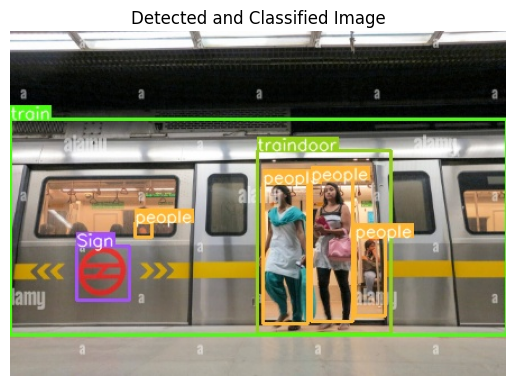

In [1]:
import base64
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

result = [
  {
    "label_visualization": {
      "type": "base64",
      "value": "/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAEzAboDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9Zo/+CW37HC2rWq+Hb87mJ8w6qdw+nGP0qZv+CX/7HatGT4WvF2H/AKCbfP8AXivWo/gF8G4VKxeAbEe21v8AGn/8KP8AhGMEeBbAkDuh4/WtP3berf3L/MftsT5ff/wDyWD/AIJmfscW9w048JXB4xsbVGwPenp/wTY/Y5W3aAeFJSGOd51M5FesH4K/CQNz4C07J65g60qfBb4TQ4aLwHpqemLcChKj3f3L/MXtsT5ff/wDy63/AOCe37HmnokUHhcRiPqP7SPzcd6ivP8Agn9+xpcwzxP4fhUTLtY/2mPkPqMng16zL8IfhXOoWXwJpbj/AG7RT/OmRfBb4QQ/LF8OtFUZyQLFMH9KqM4L7T+5f5kuVZ72/r5Hxp+2z/wTd+Deh/Cyfx7+z+LW01PR4pLi7t3ulke4hAySmME7Rkle65x8wGfnr9iDxP8AAnXfifa+C/jz8ObfVrS7cW6j94sllMDhZl8srvjwfm44UhscEH9Vv+FWfCtsKfAmjHb0BsY+P0r4g/bO/YF0L4W/F2y/aZ+EOoDRPD73BPijT7Ofy0s2KModMDCQyE7X/wCeZckYVmxjUcVJTizalOTjySPoq2+Dv/BPrwhO2lvo/hC2mCgtFdagC2D0PzuTV+Dwr+wbDB9mhsvA5QDvLE36kmvm39nv9pX4EeJ9btfhb420/wAOSs2iQHTtSkKyxJcIHWW0MjjcCMAruwSOOpGfp74Y6T8BIIZLkaR4dhfgIqwxMG9T0NONanJay/EylCrF2sV4NK/YUkmH2TSvAckijgrbwNwfw5qezsf2JxeSR2WheBTOSVkEemwFuOxAXiu2trb4QA/6JYaEuf7lrEP6Vow3HgW2XdC+lxj1URrVKorbv7xWmjgYJf2PEP2GHS/BY8pv9X/ZsA2kH/c9a0Ybj9mCRhJb6b4SJXgMmnQHHt9yuubxP4ItuG1vTk/7bIKY/j3wDCD5ni/Skx1zexj+tVzLz+//AIBNpd193/BObWT9nSAER6P4bXecnZpUXP5JSP4i/Z6s8W/9naOAuCqx6HuA9MbYzW9J8VfhhEm+f4h6GgP9/VIh/Nqry/Gz4MwErP8AFjw0h7h9ctx/7PQmuqf3/wDADll5fd/wTBn+KnwEsmDrppY9AYPCtw3fpkQ0lx8afg9YSCKPQr5g/Uw+GJyPxxHWndftGfs/2PF18bvCMeDg7vEVsMf+P1Tl/ap/ZmiYiX4+eDhj/qYbc/8As9V7v8r+/wD4AKNTo193/BK0/wAfvhrbfc8LaywH3fL8Puc/pxVa9/aX8ArCyr8OvE04YFWVPDx5GOhyelWpv2wv2V7ckSftA+EgR2XWoj/I1Wl/bX/ZOhBLfH3w2cf8878N/LNC5esX9/8AwAdOu9n+H/BPyq/aI0bTPBHxyv8ATPCUF/YFr91t7G7iZJ4oWYtEpQdZDG55GcrG3tX6L/s4/tR6/afBfw5o3ij4QeJLrVbCwjsb2e1t4yskkQC7hucHlQrexbFfMP8AwUV8Vfs7/Fn4v+Hvit8L/iHBPcRrDDrmp6ZGS9k0Eiss4LDl/KkYDg/cWtv4OftwfBj4KeHv7B8R+O9OSGO5uJFls703W1lmYHeRlizqUfOME7+2K4VKnTqNy2Nqqq+xXKtf68z7Kf8AaE18xeZb/ALxi5Azj7NDz/5EqKb9oPxmuDD+zX4zl9NsdsP5y143pv8AwV6/ZNgtlh1L4g2iMvADCQE/+OVai/4LB/sThd158VLGLrkAscfoKtV6Utr/AHP9UQqda2v9fiesp+0B46dTI37MfjYewWz/APj9WbX43+Nbpdw/Zx8Yp6CX7GD/AOj68cuP+Cyn7BFuPm+L8DtjJCqo/wDQmFZt5/wW6/YFtJCh+JbnA+9utwPzMwq1KG4clU9+j+K3xCnH7n9n3xGvtLfWC/8AtxUo+JPxKcDy/gNq4JH8erWI/wDa1fNs/wDwXV/YFtySPHU5wOcXFl/W5rLvP+C+f7B9rJ/yNMzRkfKTe2AJPpj7VT5odEHs6j6n0j4j+Mfxt0ZN1h+zXqF0Mdf7es1/9nNctrH7Sn7TFmhksP2S2kwB8sniqAMfwVTXzn4j/wCDgT9iW4cR2+vSiJOSWvrEfyuTXLar/wAHA37Eqzm2j1uTOzcJG1K02k5IwMSk549Kh1YroUqc97n1JJ+0x+11Km+H9ljTYCR9248UhiPrtjqrL+0Z+2vLGxtf2d/DUZXn97r8hyPwUV8lT/8ABwT+xmjSMuuIQgy2NTiJHp0zWTe/8HC/7Jgfba6vESWwmdQ5I6dozWf1mne3K/6+Zapy7r8D671T9oz9u6O2Elv8EfCCE9VbVZGI/lmviz9t/wCKfxz8canb2fxo8H6PpckEEj239kzSMZTJlAH3E/xAAY7uayvF/wDwcE/syalbSNpviW0gIBCu11LIehOOIB1x6184fGL/AIKlfs4/Fe4h1LWvinbJeyQxLDaeRO5jwxkTLFezlSeccGsK1Z1FZQa/r1Z0UoqD1kvwPrn/AIJ4fBv9onTviAvi3wH8MbSa7sY5WF94huZLSH97IUWZCqszsUj6f3ZK/QG01b9tm10lYpPBvgGa4AOXbVLrk5OP4fwr8+PhF/wWh/Yi/Y8+G0VvoXxe0bxrPeahawS3kOvE3DxLZLieYGNjuLqykKMLlQcHNdYn/Bzx+yXu8o6BAZNobA1iTp6/8e3pzXTQkqcErHPWjKtPmT/FH2uniD9uN9ok8CfDyPn5/wDiZXbflwK5741/ED9p3wR8IPE/iz4lWPgGw0Kz0S5bUrhFvZjHCYyp+VTluvQCvkWT/g57/ZRHzR+GICv946tMR+ltXJfGj/g4+/ZZ+LHwv8S/Ca68M2kSeItAu9NZpdQuG8vz4WjDY+zDpuz1Fa/WIpXVvuMlh5Sfxfij6e/4Jo/ED4ofEv8AZZ0u/wDgbrfhptNtLyeG6fW7a/klW5LCWRQWcLtHmAKE+UDA6g173Npf7Ykr/uvGHw/iX/sB3jH/ANKBX5Rfskf8Flfgj/wT5+Fw+EHirwTpy6688kmoatKsyNexrLJHAN0cbblSNABk+vHc+oL/AMHRXwKiZ438L2DMq54N50xnP+p9KI4pSSlZa+SCphWpNcz+8/Qg6D+2U78fEbwEgPp4auTj/wAmahfwp+2ayY/4Wz4JB/2PC0/9bivz1m/4Ol/gnBbCf/hC7NwW25X7Yct/36qG4/4OmvhBFM0P/CC2gKLuYiK6OFx/uin9ZXl9y/yI+qq/xP8A8Cf+Z+hM/hv9sqI/N8V/CuP+mXhh/wCs9QTeG/2xGy4+Mfh9AeML4YAx+chr87rj/g6j+FjEMPANrsfiE/Zbolux4yO/H5VSu/8Ag6f+HjSyQJ8NbcmJcuDpk5AP/f4UOur9Pu/4AfVop7v/AMCf+Z+is3hb9sApz8etHj9WTwzFx+ZNZ17pX7VmmxNc3v7SdpwOAnhu2H/spr84r3/g6j+Hz26XA+E9syO5VMaPL8x/G6Fc/wCIv+DpbwrOl1a23wetg8CEsToRIB/G89aiWIklovwX+RosPHq/xZ+inxC+Jnxp+GvgTU/HvjL9pKcW1hbOyQ2Wh2avNNtxHGu+M8s5A7fh1r4B8a6J+1F+1l8R7O41qz1TW9Q8UXscKajJb7LeOLBWOP5QFVAo3MwAGxWPG4GvnD9of/gvh4d/aD0Cyi1X4e6pG9tLvtbDTbKK2t5JmG0u5852JAJAPYE+pNeieCP+Czvg/wDZ1/Z3Pi74Qa5pd34qk0DSS6XusRz3/mNOy3Nv5MkZWMRAgKACSN3AABPKqlWrL3lZfL9DopqlR1Tu/mfr98Ff2JvDfwh+FOn/AA/8MePfEFtLFEH1C8sdYkgW5uioEk3lxsFGSBgZOAAMnFaJ/ZAt7qUzal8cvHs4J5U+KLhR+jivxCm/4Od/2wHt4rjT7Ro1lbChIrPKjJ5/49eBxWRqP/Byn+2xqTPbRa3cpGqEySRtbIAT2BS2GTmulzaWxDvzayP3Vj/Yx+F0kgXU/GHi67/vCbxddnP4eZWnB+xx8BI1Bm8O39zgdbnXLqT+clfz4yf8HBH7ZU5N+niXUI3kbCsNRbjJxztQYqtef8HAn7cpme0Pjy7TaB5jf2jcfKOnZhk8/oPWlzTtdpfeHu20mf0RQ/sofs8QJsPwvsJfe4LyH/x5jVvT/wBmj9n7S5RPZ/Bzw6HHRn0uNz/48DX831z/AMF8P28b6A3E3xIvlQnaipqN4GyeOf3wxWLqX/Ban9uzViYj8YtWhcxlmzqV3wfTBmPqKXtorcVo78x/TjZ/Cb4Vaevl2Pw20CEZ/g0eAf8AstWh4F8BAYHhHSQB0H2CL/4mv5WdW/4Kx/tl6ykk178YtUZmbaqG7d93ud7HHv161QX/AIKKftQyKHl+Mk+4jLfvIuv4rT9rHv8AiSlB9fw/4J7M/wDwV7/bWOJX+LmrICwG3+17r9P3vTig/wDBXP8AbN3tCfi/q2dudzavc46/9dutfFw8VWhYQyXbBFIJZVy0XOMe46flT2120SGNpZ/N/eYfYDtkHtnoR9O/1rq56U/tGV5vqfZf/D2z9sGSPMvxf1MK3BDanOSp9/3vSoH/AOCrX7YUvyp8XL7CnJLajKdw9P8AWda+P7vxJZGTyUEuVXMUmMH6Ee/SnjWdJG2ScXBjZT5kaDJU9Nw9eeccVUalNq1yZKoloz61l/4Kl/tay7X/AOFsXZ3jAJvG+UY4z8+O1Z+pf8FQP2toImlHxXuxgDH77cG9xzXyxPruiy2ZlaWYTJIREDGQJB7n+EgfUc+2azNT8RaO8VyGkufKC5GOPLk54weoOMZ4rOpOny3j+ZUXJLVn07qf/BUr9rvzRG/xhmRCnLvsPlntk9K4rxJ/wU8/bEvYOPi15hLnEMlvEyyJyDnKHjGcg18/XGtaWb63ie2ndmTZcIj4SQ9A454PcA8ZFZcVzpn9nrFFaXDOLrdaSSRscgHlSM8euR61xzbZanLue5x/8FE/2obfUZ5ofiTYqjqCZ20u0Gx8Z5/dc8YFTR/8FJP2rIY42k+K0EVy7fvY10y3O5em4YjOO3Az614Xe6lo1tf3ch8NSta3EZVoyWDQSn+JTkhuRjB55qOymhUaYW8KhprQEy7pmVZ07A8/KcelRGlZaKz9Ac5N7n0EP+Ckv7UrSSNH8ZygOPLY6fCOf7v+qx19akP/AAUZ/arupts/xouSkS/6TGtnCpBPofKr5+uZbebTZS3g1kS8uQLZ/tJ32+CeAc4IxjtVy9vLuDU7i9i8GwBbG28uaH7SxVs8ZA37s8j1HFV760YczXU9tk/b2/aivE2y/Gq7YyMPswRI13eoOE/z0qo/7bn7RVzMHufi5qbRphZ1jlIx9ABketePIZrW2tFv9Ht5EBF1Gy3HzOpP+rYh8cegwaamr2tyb14PC8Ea3rBEVrj54cdWBz0/3vXrRzyW4NvuesS/tg/H6Vvsh+L2trK43Rst84DJ+HGcU1v2s/jadtxL8XfEflEFHUapLkOD1+9x/hXmlzqiWskcp0XSgbGIRxqbvKznI5xvyTnn5aYlxqV1ImlFPD0asTPJOdRj+Q7uFL7sdf4TzzTU3fcV2up6G37Unxnune3PxY8TNJF85YanNtI6n+Pnn+RqNv2m/io8oN38SPEZFydqBtRmOw+v3/p+FcAtz4kcG+SbQUluJhGqfaY8xoCRvZCcoPVunOc1ZeHXEE7nxF4eK2W0wxLdRSGRyvRccS/nwav2ktgVzr7j9oj4iy2Ekk3xC15mt2IkH9oSgtn/AIH/AJzWbcfHbxtdM9vJ4x1oi4BKEX8mIz1x972IrnLyPUbUW8R8WaC8dwd17LGAdrH+EkLlDjHHQYNUoYdWlRZpPFWipO9yFxKmWSMk/MRsIK8A7hnAI7VLr1F/wwO9zUv/AIr+Jp4Y7v8AtvWXZJArK1+x3jnBPOD3HrWNN4jM93c2jzX7mRRK0jygFmHOc++TUogvTDcFfHOgOkEP+ijy/wDj4kAz+7JT5sMcYb/ClnsntmUz/EbQGRI2N5PFbk7COBGcRZVuTjHHHWiNeUo6/kGtyS08VhbiznuNMunLgoxWUfKF45454/nVuLXAtnPELa72xS/KguFyw6HBxx2NY4167t9RaGLxpbxSSRqwaO0+VIycljhMtxg/l71ag8ZXcEikePreWEE/Z1NqwDP13DKcfP1Bx1Paj2s1oxXNmLXS15HLJZ3BDQ4k/wBIAxkbSMY/Go5dbZbT59KvSBICsYujk5GM5A9v1rIPxD1OON7t/HdpJmdVnlFm+1eCACCme55FP1D4gaxaXrSw+M7RiEbyVitWJhQAYLZX5vl9M8/Sm6zaskg+Zqt4g/0uRFsJi0kRc7rknqM9Mcc8VFPq7SoqLpcrbXYKpnYkDA/Osf8A4T7UDLbtH4vs2E78yR2T/vG3+u3I/wD1+tSTePtTW3a6b4jWAJkwSumS5BweP9X7dfakqslfRBdssTay6C7mfRnLSBgN8jc/N6dvWqSaiwuLNP7HkZNgJbe52/OfzqR/ifr8cjbfHkB8qDKqdNbG31JKf3SePeo08RwTSwlvjjcSm4JHkxWtwQTnpyoAGTjnsPaoVW6sxptvUht5rpre5WTQcumPkO88A5yRnrkH0p8ksvnQrD4dCuIgwk+fjJJ6Z6/41H/wmVuLcyyfGDUQVnw0q2TMUJBwOW74PPH3RTNQ8URTXzQn4r6mcRqz7LFsEYDb/v8ALdGx61DqW2iF7kctnqjW5QeGiPMlUCMiU9A3v7n8jUiaZfpcGa48MDEcAELmOQElU4HXp/SoIPFOk3mxLv4n63mV8WzjT9xyCcA5k+XB/maLvxF4PERu5PijrroCqSiHTx+7Y9Au6XkcHnjj1qlU62C76FlNP1uKyinj8OICLgtMTE+xVGAOvTr3q5a3WtLcyT2+gQlfKIibyDnH3evcYrLl1Xwd5yLP488RlYkWWSI2aBZI+CSQZfvbTwPXvTY734ZoiC18deK8XClrRmtUDlskFW/e/KvA6Zzz6VLnZ3ihJvqbEWr6jFbwRtpFuI3dhc/6OcITx19cCn/2rq8xnuY9PgldM+SEtc/Kc5zxnoMelYUPifwP5Jmj8U+IPIQ7J40t4xhz0KAycnI6nH5mph4k0JzJHH4y1+NlG9WliTDRcHDkSZB2k8cj360Qqt6W/Abv3O7+JXxf8c/Eu50XU/E8ENxPbaaLaSQ2qkyZklkBUY4AVtvr8uSeTXNwazrbWkty2nJ5gYmVvJXCrjJByPp16YrFm8WeDWula38X+JZLZhizZbeJZIpOhABkwqkcZBz7YqGXxPpMZlmk8R6ti3fbqSYQxTAgggfPlznHXHQ+lNuSVl+QNt9Tpf7fvmkitgu6Joi3l+WDufHTpx2H4VVvvFWskIiui3Bk/ey+Qo2ruIwRjBPXOfSsW11D4XpbXWlXNnq0s7DzreZ7mNdo28GQBTz3wPXGe9Kms/DGTUItRj8La1Nb3EO0R/b0EjsT1+78q44xyeetS6tbt+Ac3dm7N4q1hbjzR5Tw7T5EY253Zxk496rSeIdYt0h8i58t7h8TyqgOMk8e3TrWJBrHwtj0QJN4Z1Bp7O9zLL9s+QoXJ2KNvLYwMn0PFL/wlfw0kvbsWnhm7gN1ahrZZb44ibqWkPG7Oc4GOgoUqj3/ACE3pua//CR63O9y0dwg2qxiiLqB0zkZPJ6H8aqy6j4hvLeBjr7IHk+djdAMSMHBJPyj645FUF8V+Bor2yuofBspihASVDqBDTnGODg+Xyfft9aq6j4n8JPBeWdp4fEIaQuJftRKQKDwuDyx7biepyBSvV5tU/uQ09NGaUuta0xnibVFYR8RxrNna3ILAA/MeO31zxUUN3q9vfwRNrULRuMtIbsde4YnoeMY/pWbb+I/DNtqdter4eIR7fYkC32OccsSBx9Bjp1qteeIPDY0wWNpYFpUuwzT+efnb+6PRevJyaI+0l3E9DeuNUvBZTy2+qxedG4Xas3KjGDhccjvnp+dTC7kmgitB4kg8ny925Zm2lgpJB6HPI9awrzxbpH2i5A0q0Yz2zeYhZ9tucABsbuTx06VWTxdpIitAmjWe63LZIhbM/zZzIcggcYwMdabU77bg7G6NXdrZvP1fbPI+GjDEeUuDhsngdx61PLc2VxcrFF4h3QKG5TcTKdvuOufwFc2njXTrY3SRWsWy4w0xjixg5ztX26c9cDr6ufxfBbT2rw20e4IAoVcRxKe3PU9D/nh+zbWoKUUzdjv/LBkg1F2eRj5x5wijj6f/rq0ZrGG/jEmpMcKGXYzEuee3f6npXMReMWkt5g9tC6tNkxLguxxyTjovP8AnrVyTx1OHW6stPtoZI4zl/sw24IxgDBA/HuPxqvZrksxcybL0GoaeE85NRdHeUBncZCjoRnJ6kjiryXGkqoU3tycDqI1wfzauas/Fl5Jp/kxNCA0oJCR4Cc4BLdT9M/gKlk8e3ySMh1tWwSNywRgH6e1VChJLVX+QOUWa8viqQRCW0kU9VZm6nHcZ57dKuR+J91uJWuAdpOMSYyOPmx+VcG08kkG0kI6JtBwQMn0/EDrUpadYUe4YE7Puk44ABxjI7E9q3cVukTqdxP4mIcRNuboSV6k8cH9TULeOZLeHEuZFd9rKwIx2J9a5Cx11xG0D2e8H5UdH+ZT/UdKo6lrEtmRH5UuCvLA98DjJ9j+lS4xS1Qc3Y7hviN9nQsiryo2gHO4HOcj1rJv/G2mGUxReZym8Ddg5Az361yI1SSNFLb2znBJB3f54FQ31zCYlR7UqDtJLLgnnHbt/hS5E9yrs6A+L7EzebscKVHn9Rg9iOOetOXxVCIXZcsyP8kj9WTnrz16fpXLm/gllUTqExxlgevXqPrUomS2U7QDzkc459OnIpcrtZCW50R16AQvmaTHJh8sjch4PQnpwaP+EouGkMflKscpPmbQDuPrg9K53zo7lHliPzHPAOSAO/UY5/rRJqFtKu6FgJN2CPu4x6gfzoUEkHU6NPF2q7I/nG+MkFtu7cvXGB6cj/69TT+KZXEgeT920nmRYODGc5HTjtXMDfJLtNwQGJwTkjIPIIx0+npQl9JHO9szZ3RgDPsM8en+NXaS3C+p1L+Jbjznu8Lh0EbqJflLLnn0FIvisvdRzsoMkY+eTswz0P5da5jz7sMyPJxkHBOcf5FRRXckcryws4Y/eUnsDx7etTzeQWT1OpbxKyWhtVg+TzNyPkHYeeB7H2ol11p55ZBGsZnTbIgXO49j7c/zrmlu70wgJCowNoDr3PpRJdyrh2OV/h9M9cHFJvXQfS50MXiSRZYbiGEKYl2l9hJZfQ+3JqAakohe3W58sGcSIcnIbGOPSsn+07llCFFjOCSF7057u3yXdGJbk7mHBBp301RO+iNe4124vPOmiuD++x5y5wD3zyR1qNdWnUD7PcljF8gJbJ28nHX0yKym1EhCUXbmPK56/wD6/wD61M/tOPJdbZiQ2GHf604zV7NA9OpptqcsEQt0uJCqvv2hs4PQkc5H/wBb2pZ9Vu5JZJJpW/0nmVQBzyD0FZMF4PPDJbhcnBwvr/8AX/nStOjMJH3CMEYUjkf/AFuaHNWshat6GxHe3wmjeO5bMcRQuy8bcEYwOO+M1BJqN9E4hjnI8kmRVEf3WPX+QrNiubc5bdtKggFvypb++VJGTYf3gAyp4H+f6UXjbYfU0zd3jQyubj93dSBpV2nlgSfX3p0l/cupeJwN0GwMSc427f8ACsyG7Bl2QyuBjjLdB/8AqzSTXQijLLO+0t/A2CPqaPdW6ElrozSi1G9jS3t45EPlcr8uCpPXn8sUy4vL7y3gVkVC4IODwfmGB+Z/SqQ1BBEkmWY5AwHxnvn9P1pwvbdsieV9zEFwZMD6004WsDTL8mq30UhbzI2MkBjI45Xbt/Piqn227EkRTgRN+5xxt7/jVSe4j3gRTkAHKICDwD7037R5G+aW8xnliozk/wCPP6Urxeg7dSeS9vI43tmRHMk4kYHuR+vepW1e9MzK8qDfF5bMgB4xj+QxVKWUsMi8wQSCN3OOmPz/AJ01Zo23CSUcE4OfQcUmkgSdy1HeSkLFGPngcFOBweuaUX808Uke4KrrliQBvP8AiM1Tg3nLSXQ+Y8hW4PB5pt9crxEH3FWBbaefw9qpOK2Q7F99RvJom5UKIxGDjlgCOAfy/Kmx3WqwxAKEyudp4+Uf/XJqo2oMYlXzTsK4Ge3Y/wBKQ3hmlWKK7LZXjB5JPv3xReNydXsXY5rp43jcoqlty/L8uf6dalFxexlnkm5cBc7STjIPWs9NQllkeKaZlO4AMrZHX1/T86WczRKY1u2LZB3K465OeOtD5L3GWw90XjmjlBEZygXPHfp27mhrma4YRNNhAQWULyTjqaq291L5RzdtJknOTj24/CmSvcR7pY5dkZHAVuvrz1z1pN0+gveuaV090QXa7zvI3lVx6Y/pTXuWjWMxXDKEGYzuHykDj8s1l3E8TvtkJMbN/ewCMjPWmQXNsInKQ8qo+UnOQOvNNyV1ZWGk2jSkjvVVl+0yFCCWTP8AF3/z2qCKMzTv5tywKpkHcMD8fy4qGWa1a3LW2cbM4Jz2B6/0pttPEqlDuwozIxTjnHH+RSbu9hWL4jhtULi5csH4G/qcZ/xqNDA7kTXKgMBlRIT0zx+tUEuVjGSWAYnBOSDwOlKLtndQqF8Y+YcE+3t2obu9ikmloXUliO4kBQihQwI68dBikup7MyRwxFQQ2ZHA69M9PpVOXUdsUjGEKxcEhCMHg/40xr/pGIM5A3ccHGelPmaVkgtJ7Ggb22VNm4/vCRlAfXp+tLNfPCWH2ckMxIBKjackZ6Z6D9azYruVx9ngfbkjeQOP8aU3Uu5mnZTnGOmBjt/n1qbt6ByO5oy3sYbZHnHUuXwPwHb1p/2qdG8+UDYOGPmHAPfr0rJ33kzeYQCp42gAAHp3/wA801o2DBS5KHsjZx6ijVByo2JtZkls1aKKAsMg7h0PHP4n+VUZNYvnkHmlUVFAUhRjHp796gSKQ7mFxhWOSnIye3TimLFPsCRkt6gfNz9c/Sn7zVgSiWIb68iiBjvWVyeQgAUn/wDV1qQ63PngE++3rVOaKBECQtnnkAc9KVZY9ozLJnHOIxj+dVeb6g4xl0LltDIu3E3zNgAM2ce/8jXuelfsdJ4k/ZTvf2ivD3xctru/0fTPt+o+HYdPaSO2i87yvLe434WbHz+WVztHuK8CieaLc0cgVMAg4I6HORX0hov7c3hfTv2QZP2cv+Fe6hHfyeHbjTDfwamBbM8l15/nmHbkvgbSxOcDjg8aJQJuj56a5vpI3ikmKlcgfLgnGOSM/wCc06G8vmikW3nQvtH8J544/HFU457iONkMZYNgsc+nA46HpTZJyqhoi3JIDGMcH/OKLJLRhZXvY0VvbibEv2cFidrAE4BHGcE1XllnMarIpJzuOVyD6HNVradXdZWZlZ+MoxBye/NLcznaiklSX5J69e9S02tWUlYlj1G1jm3+QSQTsUj7vv8AzpZr6K4tnUyBCnTHIUc4xVCSZ1l3SHcwOCD2qczIylXLAgfNkYB6n/ClqKyJ7e7tYwqvH8oGW4zwepqKREkjIhO8MxOI/Xjg/rUaSWrfNLJwwwxweexpIZbeBmBjDRN2C9PejlSQy6Z4DF5aTbht6+gOPWkjTbFHBsyNvfg/XP41V8uLyvMcr9442t+OMU6OJWiJjugeRyGPGBRZpAWZC+/57rBZcABgRnp096aiSvcFGgCMi4JJ5GOP61Xjs7oOXDbk2ZBBpWimkIkklYZXv6enHX1pWa3QaHvPwE/Y5t/j58JNZ8eWPxZtbPWtNt7ya28PR2DTl47eISFp5Q/+jhydqZB3EV4fFBKX28FSfmzwR1A5/HrX0P8As0/tw+GPgP8AAu8+FV/4Avr26uLi/Zb6z1EQxSC5tvIHmoVPmFO3OACcc9fnKR5liKvICS2Du78UcobD4rmZJQrx7ghLMA/UZqaS8upB5skbKA4HyYzjuMmqwim80CNQMry2KkuLidUZREgOAQRgcEdxTV0GhIb52DHltpBDFOB27U23u4nLzXC5JbJAH8/yqAtcSSbMqMDjJJwabb3Vym63aEZxyeh/PtSu3K7FYs/ak83fFEEZlAAx9aBJEI2VVJYtgKV6H/JqD7XcK6ssQIUcfL+v51It67PmWL5iMgx8f/q4NJqwJakkc0YlHmwBHA5BGePw+majluomkOZRgLgc8L36d6IrnzMN5eGAJ6DntUb3Cj5LmPfv/X3HvRpawWVyT7ciSGSMkZGAOce34Us8tvGVCDnH8bcf54/WoUuFjZkS23dAGHYfh71YedA5iMG5gB8+ck/4UrK+oaIa7qkgLMWAUMGI7/5Fez/sifsoaJ+1Je6pp9/8VINBv4JooNMsV083c11I4di7IrqUhTHzSHIG4V4o9zEXMb25UPwc9VOP617/APsVftk+EP2V9K1m21nwDfanJqWo2N1DcafqAt3/ANHL5hdipLxneDt4BK807JaILanhOt6XP4e1u80LUPLM1ldS287qeN6OQccdMg/pVR50hVY1IfcPmz61o+LdbtvE3ijVte+zPDHqOoTXCgnkGR2cA8Y4zWaq2+QVI3B/mypzgcfyoshj5fLjfEKgAHK9yRmkmeKGQtGc5I60OkJIjSNhjIbK/SkeO3YA7H3f3TGc9PpRZArjYrmOViCWCb+e2Ov6U0gLIcy4UkHof8KmkgIRUS2YnHJCduaRLO4WRQ1hIATjPlkn6/0oshCSz+Yu2MnG35TjGATTHk8oFhJ8xAGUXgVYfTLtQqx2DsMcEryef88U6PS7vb8unuG2lgpU5PTHFDHsiBCsLKY3YnPU469evarF6EmQESszBtrF2yM807+zb4DzRaHIPJ8vgYq1f6RqsUYmfT2KJ8zIqngY5+lLpcLlE3UZCWccA+TO4s2CT6025nllmDo5URkbUDHp3xx+P41clspigCaVKrKudxHBPX2PtUFvo9/fIfs9k5ywCgn2yRQ7X3BWPRP2YfgX4e/aH8fzeFPEXxCi8OJDZ+ZCUtGvLi7mZ1RIoYQyl2y244PyqpNcr8ZPhxqHwS+LOu/CrVr9LufQNSltDcwqQs208Pg8jIwdvOCcc16T+yF8c7f9mvxZrfiHXfh9e6oupaG1jC+n34tp7d/NWTKyEEgME2tgZwfwPJ/tCeLbr4yfGzxL8UbXw5LZQa7qBu1s5pVd4gQAVJAwTxVO3cEeePcK0gEb7lJ5BXpz0pVnMY3SDDgtxt/I1dfw3rKL/wAeDFt2eSB05HQ9aVfDOs3ch22ykqcbhgjOcVLcFux9SgZUhkYEBSDxgd/ekku3L740CAA5AXrwK1l8G6uzJcyIh+UjaTgZHb+dJ/wiWtbCfKVQpPCv175/Ki8X1C77GQJUkUtHCch/l4xx/SljubwyeWYlJHpj0Pf8a17LwjqQUyu0IymFBYg9qnt/COtTSMu+EbVUEjgU7roIxNs0ih1iXKL1Hb+lCQTTEgFAMduCf056VrXvhvUhd5N6gHOHVTgZ4pbfwvf45uE4wwYA8+2R/nijmWw92ZEiz28QheJTuXhmOMc0LbyeSzQYBdgJCxHGOePXvWwvhPUCgWS+jjLYOGPqeufyqSLwkACbnV40dcDZtzk/XuaHa12K9nYz7axlgjedpkIVSQxXJzngH/Pc10/wG+FGj/GX4oWfgzxF4/h8O2Fykkk2qXMPmEBFLlI49ymSRiAqoDkkisWXwfHGHaPVAflByp7Hqf516F+yp4+8P/s7/F6y+KWt2B1aGytbqCS2t7kRzRGWFoxNGxB2spYEHH+NNNPZD9WZP7T3wAk/Zs+L9z8NrjxGdSjWwhvLS+ezaCSSKVA4DRkkxuASCpJxjrXn0lnbxyNHFdhlViFOOor1/wDau+KPhz9o74tR/Eews7jTIV0eys1tLu8FxJ+6QIWaQYyT1zjNeVyaBoSuVTXuATjr/hSenQZ/Qj4j/wCCAH/BO/w/8OdC+I8v7Lly1vrXnB2bxRrQWIK4WP5vtf8AGOR6isXUP+CD3/BPrRtNh1jVP2Q7+1trmdoYJ5/FOuIJJBkFATd8kEEY9QfSvta91ODWfg/4Te11a1P/AAjmpXMep2k12qyASzo8bLGTl0xkZGcbTnFa+s/FDSdQ/ac1Txfq3iXzNPa8uotM1EAyxWpMbxwTKvOFQlWyoyMZHNfwZX4jzupKnJZxiqamsNFf7RNq9SnerUbcl7sJxcXHRKTd5RSsfx7WzrM5uEo5niKakqEV++k1ecL1JtuS0jJNNaLmbvJJWPh69/4IM/8ABPjwddWjeOf2PtZ0+xllQuz+JtbQsrHkLvu9u7AOAfSnah/wQi/4Jra/4sn0f4d/sh67dQpceXDBeeJ9ZNyj7SSsgju8A4VuPRT6Gvt+9ivPBfwf1Dw74v8AHWm3l3feJ7G7s7O11dLxjEiy+ZPlWIQHK8/eOORipfiB8R9M/sv4j2/hnxWqtrPjK3lt/sk5U3dsBcFiCOWTJTPbkVvVz3iPD0bVs4xUFbncJV5e1VoVnyX50lzOnH7P207OyT3qZrnVGlarmeIhpzOLqy9orRqvlvzJa8kfs/bWj0v+J/8AwWm/4Jkfsu/sifs7aP4o+CPwLufDHiZvHtrp2oPPrOo3L/ZWsr2VozHdTyKoLRRNuC544OCc/mFceHngiYzllkRlLcAY+n6/lX9G3/BZD9mbxt+3L8DPA3w7+DHinw7Hq2mnS77VbnxBdTpETDaXkDxloYpGMgM0QwQBtB54AP56wf8ABCL9q2J3L+L/AIWNuQ4f+0dQySVPX/Q/X9K/b/DvxF4dynIHhs5zXnqqpKzqzlOfK7ON5O97J23te9j9Y4J41yPLsmdDM8x5qinLWpJylyuzjdu+y03PzRh0r7ZK8dlIrtng7eemOBT38L6szmeTTmOAuF2kcdP8/Wv0u0v/AIIP/tSQoP7U8c/DWQkHcI9QvvlPbaTZZrUg/wCCGP7RceN/jD4dt2IOoXvqe/2P3r7xeK/h6/8AmZU/vf8AkfXf8RD4K/6Dofe/8j8wo/COqXKhF06QBRkEH1NObwVqjofKs5GI4UjHORn/AD9a/UG1/wCCHP7QsEnnHxV8PN+MDbqN7gfnZ0D/AIIcftCpJ5y+L/h/uIO8f2le8n/wDp/8RW8PLf8AIypfe/8AIX/EQ+CX/wAx0Pvf+R+Yj+B9WVYzJazoe2Oeo9Pf+lMPgTWC4aGzlC4CuXjHvz79a/UGX/gh7+0LNHsbxh4AXBBUJqV4MHGP+fOi3/4Ie/tEQwIjeNfARZR8xGqXuP8A0j9aH4reHnTMqX3v/If/ABEPgn/oOh97/wAj8wbfwF4lBz9hbYvVQRz+v+c1K/w98RFSjaVKE7KzjjvnFfp7N/wRA/aDkKhPG3gQKucD+0rz/wCRKgi/4Ie/tJow3+O/AJHOf+Jlen+dnU/8RW8Pra5lS+9/5B/xEPgn/oOh97/yPzKufAnieCDfHYMBjKgsDj36/WodP8J6nqkrxWkbtJyR5gwBz2Jr9PJP+CH37SDHjx34DwOB/wATO96Z/wCvOj/hx9+0gsgkj8ceAQR/EdTvSf8A0j4p/wDEV/D2+mZU/vf+QPxC4It/v0Pvf+R+aX/CuvEiyFHso9ysVQeevUgdB1pZPhzrk10StooVowSTOpGfzr9Gbz/ghl+1heXrSf8ACf8Awzij3kpLDe34nIwcZb7L9PyqpD/wQg/a3iT5fih8OVYABdupalg/Nk7v9G5Pp6U14r+HnXMqf3v/ACF/xELgn/oOh97/AMj88U+G2sRIS8FsNwHDXKA4z6bvan2/w+vWSQnyAykgZuFJBGSc81+h8/8AwQn/AGuJpGkX4m/Dhd6nI/tLU8BixPyj7ONvBH41DF/wQa/a0hMyJ8V/h/5chYgf2tqm8HBC5byOR0yO+Pen/wARW8PE9Myp/e/8g/4iFwT/ANB0Pvf+R+ekHgS7jP8ApFxpwB4wLxTzzxnOB06VYPgQQXCxPc2aOVBRzdLhj0wPx9K/QQ/8EGv2rjEiN8Tvh5vVlIkGq6lgAdRtNthj7k8+lO/4cP8A7VyS+ZH8SPh+QYwJFbXdS+Y7gTj/AEP5PwziheK3h3b/AJGVP73/AJB/xEPgr/oOh97/AMj8928B3BlWOS4tUaLcTtlyRyOcAe1D+BvPiN1FqNoVGQDknn04X3r9DD/wQn/as8oJJ49+HswBYrG+u6gNhOMNu+wkt06Hj8+HRf8ABCj9qeO6V08cfDxAGBaZNavNxwoGNh04g9PXn2qV4reHd7f2lTt6v/IP+IhcE/8AQdD73/kfntH4EnWZUeaB2dV2EI5J6Drtp/8AwhKkuY5FGAC/+jykg5A4ynr6V+hMf/BDL9qlVcf8Jb8OUX5P3S67dkSAdQx/szI9eO/pUc//AAQr/aqntUgbxl8ODjPDaxdHy/mz8p/sznj1FN+Kfhy1/wAjOn+P+Qf8RD4Kv/v0Pvf+R+fv/CCRDDyzZjbhT9kkyO+D8vv/ADp8PgOBZfnkcgxjraOQef72MV+gZ/4IV/tSm6WRPHPw6TGd9wupXPmvxjB/4loGP6HvUKf8EJ/2rTG+/wAbfDJM7Ntul/eGNsdS3+gAk9OnqfpUrxU8Orf8jKn97/yB+InBfTHQ+9/5HwCfBitGH86Rk5bc1oV6cZx3xjt+lS/8IfYQqGkncli28Lb8rg855yPxFffbf8EKP2shapbw/Ej4b52/Mz39+dh3Z+TFoMcdfWlP/BCj9rJp2b/hZ3w6VAZPLZdQ1ISHI43sLcZwcdumaT8VPDu//Iypfe/8h/8AEQ+Cv+g6n97/AMj4Kh8MQPe/ZrSB5OMs0cCsvryQa5/X9SsNC1N9JmhLyQNghoRgAj6+/wClfo7pX/BC79qO11BrzUviX4DlXjZHb6xqUaj1yptmDVyHj7/g32/bD8TeLrrXdK+I/wAMVgmK+Wk+sagrDCgc4sD3HrVR8VfDrm1zGl97/wAgfiHwVb/fofe/8j4ETxjAobfYL/dTamORxjrT38X24kLSQswAAUkA59O9fcH/ABDt/trNEIm+JfwrAB5A1rUv/lfSf8Q7H7a2d5+Jnwq5Jyh1nUcD6f8AEvqn4p+HH/Qypfj/AJC/4iJwX/0HQ+9/5HxJJ43VEVPs7OODtJxg5xUb+MRI0jrakDaFVPMALA9s4r7eP/Buz+20UKn4mfCr1AOtakRn/wAF9M/4h0/22SMt8UfhYTn/AKDepcc5/wCgfSfip4cW/wCRlT+9/wCQ/wDiIfBX/QdD73/kfFCePLVLc+dp7cj7qzIOnH9zimP8QlkQw/Z5BHI+cbxwMcfw19ux/wDBu3+22sZQ/Ez4U5bqw1nUenf/AJh/+c0P/wAG637anzeV8TvhZznGda1Hj/yn8014qeHC2zGl97/yD/iInBW316H3v/I+Ij44sI0bzdLkdmUbB54G3t/dz/Kq1j4xFmwS3sGKr6zdDx6L6f56V9ySf8G637bMj5PxO+FfUZI1vUhx/wCC+nR/8G6n7aa5L/FH4XknsuuakO3/AGD6X/EVPDl/8zKl97/yEvETgr/oOh97/wAj4hb4h3bSBDCMFjjdMcEflSP4386ZWfT0YsCF3XEn4nAr7cP/AAboftqF9w+KHwtAONynXNSPT/uH0xP+DdH9t7zN0vxV+Fh5GH/tzUiR/wCU+h+Knhy1/wAjKn97/wAg/wCIh8FX/wB+h97/AMj4mHjd2uNv9jx7McMJpeOn+17AVE3jibC40iLb5mWbzZCT2/ve9fcMv/But+245O34o/CvnHP9uamMf+SFEv8Awbp/tsPEqL8UfharLwGGual9f+gf1prxV8OV/wAzKl+P+Q/+Ih8Ff9B0Pvf+R8QSeNbkxJt02JNoKqrtIRtI56tUcXjfVBA0MOnxdzuwehx7819yH/g3U/bZO1m+KfwuJH3j/bmpZP8A5T/6Uwf8G6X7b3mBj8UfhXjBzjW9SHb/ALB9H/EVfDm//Iyp/e/8g/4iHwT/ANB0Pvf+R8NJ4vvnZtunwoB1UQ5yD/PtRN4x1tmISGEEAbibdRgen0r7jH/Buh+26AFX4o/CsDHP/E+1PP8A6b6kP/Bup+2wTkfEv4VAk8n+29SP/uPql4reHKd1mVP73/kL/iIfBP8A0HQ+9/5HwfP4g1i8bLS264OVPkJwOeASOagGr6sCZBdKF24JCgED0wBivvWH/g3R/bZjHzfE/wCFeccY1zUzz/4L+lJ/xDo/tvY5+Kfwr+n9t6l/P+z6n/iK3h3f/kZU/vf+Q/8AiIfBX/QdD73/AJHwedd1Jxs+3fRMfTvjn/61NbVNVnuN819gknLY7d8cV95f8Q6H7baFjF8TfhSCw5P9t6l1zn/oH/5xR/xDo/tvBePil8Ks+n9tal/8r6P+IreHdv8AkZU/vf8AkL/iIfBP/QdD73/kfB0d5q1uA8OpyheQOTggY4qCeXUhOJjeMzE/OQSPTOa++H/4N0v24im1Piv8Kxk5P/E61L8P+YfUbf8ABuX+3Axy3xW+FmSACf7c1P0/7B9P/iK3h1/0Mqf3v/IP+Ih8E/8AQdT+9/5HwVPcX0rGR76QhcYYOfp3piyMFAEsnT/Pevvs/wDBud+2+WDN8Wfhcf8AuOakCOMdf7Pp4/4N1P24gAB8X/heMDoNY1H/AOV9H/EVvDt/8zKn97/yH/xEPgn/AKDofe/8j1T/AIKifDe+1P8Aav8AEGqLe4t7+SzmeE4Ub4dPt9gJ/wBsoy4/rXzXceAP3y/Y1zeX5C2Cj+CLHmwOTk8su+P8BX29+3H+zvqnxU/ak1/Xn+NPh/RoUFgLfT7vVEjljMdtAwZ1bod4JHqrCvDNR/ZN1TRhc6lqX7RHhaMvGkSG31TzmwJA6qFRPl+buOgJHSungSo48EZZf/oHo/8ApuJ7PB1K/COXtL/lxS/9NxPC4fAkQljn0pc2sSeVaM4GZZHzJC2APmyyuhPY8U6P4cRG4/s+1dQZI0lu50P3BKPMhX22yK6fj7177D+x7fwGJ7r45eF0FmAbfyNXRuj+YMdDwx4z06dK57xT+zlJoinTNJ+KWnak9y+6UQXUYKEyebyS3IDHI5wORxmvqlW1/wCHPo1SkzyCDwXqGr7Lm0hWKW+ZU0aPacJHL88bcnI2zB17U6TwFYXUMkcC7be3aMBl/immJKgf7twpH/Aq9Y8J/ATXvFXxIfwfp/iGdowjg6nDAWtUO4SCNHGBncRjJGM+9emar/wT08XaX5IsviRaXKw3PnbEiYIW3edlsEEjzADx3P1q1UXYXsnex4/pnwW1NdKLzhp3klGG2DgYHyjAHT1q/afCbU3QH7CAMZO5f519haN+zFe6P4Ls7jX9QhEENqGuNWkiKW7ysckg9FAJ9fxrtPEn7E934Q1ZNIs9atdUmn05bpVtIy2Fyccc/n3og3J3Y3TR+feifDS61HxHd21vJdBrUBJLYxERfN0YHHJ4Pfj8a07P9n+/0tbq4u0up1ZzIRJ82zj7qgD9Oe1fXXhT9m/4hW9hqTyQ6bcyfbStvFFbPutgzABJcHBfJPp6DNWov2e/ijB4UfS73WNHbU3nNvJqX9nSCOKYnCIY9/3uQNuck/XFWp66k+zs7XPjnwn8Jr280CK9RrqWOZ2aJrxD5gXJwCMDH+FaFt8KdQdwn2VgOuQv4Cvt7Tf2ZtN0LwwYvEuuWgNgkceoXskYjRZmVSd3zfu8llIBP8YqnL8LPhBYW5S8+IOlLJyERJkYtj6Mf8mm52H7N2PjK7+Gl1CpeWFhkDOU6j/IqHRvhO00jXhh6r8uARivsbVvg78JJZI3j+IFi2SC8ZODtP41538QrL4deEdfPh/TPGSlRbq7TW+gXVyp3HgbolKjGDxnPtg5pSqcse4eyfc8CuPhrdrcrG0BG1uOPSmXPwXfVi2q3FtJ59rHmB068DOMd817XPa+A4wLqLxzeOFGSR4Ou+V9eoyfarh8YeCrGzsdCg1LU53urpTdznwfLGsIVX5G+YE5BI5xzjrWTqS6ofs30Z+evxPsfjB4M8ST2tn4ou2jm1V4bRFsIsL/AKt1UNjvHJnp/CfQ49H+JPgPxRo+pWUlnoF3CJZEH9oQySTBwEGT5MYIGCe4+avqq7+FnwQv54dQ/wCE88RI8MpdCvhGN1GeCCDOM4BOM1p/DDw34Z1bxfeab4r8YXFlocdtGunancW1tby3E/JkVosyGNQoGCTyfyq41HdWQlRe9z4as/Afju5vFsl0PUI5poIFMbQzss5ZlOGcxbYsg5zxt6cc1Gnw28eTaZPD/wAIxqDhRKwt5LOdfJJZFDK32bMp6Dbzgc+pr9L4vhd+zFaIYrz43HccE4mgzn14ipsvgf8AZOKBbr4yTMitxtkQ/wDoMNXzS36idJn5sD4VeMpJLW/h0PUdsdwFW7j0mQzqFjUYMRtOFBOAxxn14xTl+BnjVdYW2Pgy4jEsVurRJYubeY/KzGSQ2ny9iQDwQRxiv0WsfA37GGjFltfibdL5jlnw0rE5OT/yyPftUk2nfsXxqUk+IeosNw+7Hc4/SGp9pJrQXspM/OVfgL4rfRTbz+DLiQRRswhuNLCiJmkTJhH2YbmIHOR0yfcTt8EPFMd/HqqeDtUbE0mZ4rCIXSjYgGf3SgL1xz/e9BX6HyRfsVhgW8Waq6qxCMDdDoew2Dj61gfES6/ZOtdFkn8FWt1qmqrKrQRajeXsMQOQCdyqSCFJIwOTVObitCvYu2p8K2XwN8Wx6ittD4DmKubYDy7GMWzYUEmTlSSD1992O1Mi+D/idNOa1bwNewyxwj93eW8feTI8kLMNnvnrg/Svs+3u/g9f2yrqU9rp7pzJ9huNSnaU9gDIirGPqr/1qWy8Ofsdzh7zxY97f3L5YI8V20aHHbcPWs5VKuyEqaSPjB/hT4+mjt7yw8Fag43ykFJUW5AKjbvk+1YIPt2DDjNWrD4cfEKTVfs8GhNhTCvnxyYgiAQbg8X2wliMjt1yec5r6T8OQfC3wnrWtMfBL6hZ3N6z6WsOszQpBBjaoKPbsQcAEjOM8Diu8+C/w8k+LV9fRfCv9m5dSjs9h1FB4oghYGQsUx5lspbIjfpnGOetcmNzKhl1CVfFVI06cbXlKSjFXaSu20ldtJX3bSE4wpw5pNJHxcvwr+LjacRbeG7qCURDdHLqLt5x39Ezdny+OTzzg+uKfL8K/i5LFG8egyMpklb7GdWYSRZxt3S+d8/POMcbcd6+99W/Zd+MosQvh39liziuRLu8y+8aWkybck42hE9hnPHoanvP2Yvildh0T9ka3jD9h46tDj6EKCK8D/XnhH/oZYf/AMHUv/kjn+sYO/8AEj96PgXRfh5440HWn1DxdoYuLTfGTqD6t5QhO0AnYGIbBOMHrt968H/aniNh8atQjRdyGCDhl4/1Yxiv1pk/Yx+PN9pFxrEP7GolsEcJLdDxdA8MbY+UFvug/Wvmj4h/8Ehf2ovit8W9U8deI/hFDYabcSxiy06x8UWj7UUEHJMqnpggZ4yR71tDjXhKNROeY0Emrq9anr5r3gniMKl/Ej96PzqTzIl80Q9e7AYPHPampcl2aXyhwcN8o24weeRX6V2//BFTxRNMkB+BmuTsWwETxPYgsSMYA+1HmrFv/wAEaNViybj9m7WJGPBH/CY2C9/+u5/lWq474Njqszw//g6n/wDJGLxGGe84/ev8z8zPtZ2rviHYrtUYHvmiLey7JVU/NkE4B57Y/wA9K/Tcf8Edb9PlH7KmqSKD/F4+sAT9fnqZf+CQ2rxwCKP9ki7OPu7/AB9Ynv3+ak+OuC/+hnh//B1P/wCSD6xhr6zj96PzEjidQyE4LH5AOcYI6/lTpXe4gDJuznJVMbj9BX6P+Of+CZtt8MtGh1rxZ+yreQWsl0sEbW3iaK6YyFWIBWDewGEbkgDtnJFcqf2Svh+UCxfsxamx29WS4b/2lXt4DNcBmlD2+Dqwq0725oSjKN1urxbWnU2g4VFzRaa8j4CTcHYPK6785APP+etSguJWhR3Y5yZCepHbp7Y/AV9+R/sl+E+BB+yxdnAx+8s7g8Y/3KmX9k7RI4y0P7LMi8HltOn9f92uxy6F8rPhDwrpOnazdNY65rjWcZiLeZ1zjPHT0z+Vb/8AwiHwrjEhuvHs7gYPy2zgcdRnb0x719my/s06RaTCRv2areMkAAvp8gI6/T1/Wrtl+zJJdRuNK/ZutnHUj+znbHty1JyT9BKLR8UJ4T+GcrHb41u3gA4cxng9uNlOk8FfChCXl8WX+STuCADtjutfc8P7KHiiVQIv2bbTkDO7TMfzatC1/ZI+IHHlfs1acBgctaIPzzJQm07ofKz4Im8NfCCAceJNSdihD5ZcsPwXrxQdN+DUZVZJdbkDliS8fIzx04zyK/QWH9kP4p53w/s4aIpPCkwQj+ctba/sPftENpy6uP2cNMgtWwVuZLWEIfT5jLijmle4+Vo/MbxTaeCYLdX0BNRE/BAli9+SQCf8irPgyw+Hb6a3/CQafqMtyr/MtsOSMccZHcnrX6z/ABV/4Jm/tE/DzxTF4Y0D4d6Frrzael08+n2MYCAvIm0qzk5GzOfcVytn+wt+03OryxfCPSx5cojk8u1tjtk4AU4B5ycY9xVKchcjR+aS2fwkjlKjwVrsoD8GQYVPXo3XP6VLDZfCdnMZ8D6lIcnarbhtHHo3b1r9KLv9iL9pa1Vpbj4ZabGBIIWYadBxJnG3hPve1Y97+y98dNHEt1f+CNPhS2fZPIdLj2xOeisfKwDyOD61DfYajK5+fbQ/C4p56fDrUJSSV3FpACefQ8//AF6SWy8KCYSWHwau5kVjgL5gPYYzjHHJr7+t/wBnD4tX674bTR4+MgG2hXB+ghq6f2WPjK/y+fpKnOcbR/SKhNrQOVtn5/f2fo16cW3wGvSrZJJLgqffjFc/4q+H3iO/u1Xw98KtUssNyqW7Mp46dAfT1r9Jo/2WfjYXCprunxjHJDEenpHV63/Y9+NV2S48dWMRz8oE8nAx7L+lPmaGoM/OHwp4G8V2Ojm1vvgfe3lySQ0k9vJ8wyevHH/1hX9AH7HENxb/ALInwrgu9O+xyp8N9DWW0I/1DDT4AU/4CePwr4mP7E3xhlQ+Z8SLVdwG4rLNnp9Oa+/fg3oV34X+EHhTwzf3Xnz6d4bsbWabn948duiFueeSCa/mn6S2uR4C/wDz8l/6Sfg3jxFxynB/45f+knk/xm/Zf0z4hfFDU/GckmqLJe+Tv+yyKE+SGOMY+XPRPzrCh/Yi8N3GY7ka4+48ZuE7e+yv00/Zy/Ze8OfEH4UaT411TyjJeefkO3PyXEkf8kr02y/Y/wDh1Bgz2sLEDAwtftnAavwPlen/ADDUP/TUT9c4Pklwjl2v/Lij/wCm4n5Bn9hfweOJbfXHJPH+kr/8TUsP7DHg9Jo4xYauDISFVroDOBnnj2/Wv2Ej/ZR+FMQO+ziBPTIFZsn7KvgLUvEMs9lBD5FrbCKPjrI5DPn6BUx6ZavquWy2PolKN9T8jLj9gLwnI28aXqH0N8P8Kq3H7BXhK03XLaXeqf7xvMn+Vfr9e/sl+DHVlEUC8delcn8Q/wBj3w/H4fnudOvYllRdyLuGCaUVrqW5Ra0PlWD9ni31v4d6noXi3ToILeTwgUg8OW7ErbRhJAjknkMeBjoPLGOc13EP7PWk2lyr2Whw2Vq2lWa3eqtO5lCox2xKM4OcsOf7/riu78D6nc+JfF7+Cdet9PileA2Vzc7vnkHIyD6ck46ZNfSWj/CzRFsFhd7WVDGi7Su8fL0P+fSuhxSRgfJVp+zz4L0PV/EV9pnhMpLe6hYvKwmcl2xGhPX+6K5eH9mTxPrPj3xhB4m0nTn0BfFWkT+GbWCSRZbaJBaPJvOBuZpVdupxnGccD7sHw10EPLIQmZWVn+QdVxj+VSj4faIJJZFKgyyK7/KOq4x/IVDSYLQ+Dfil+xj4P17wH470qbwq8iatrVpNKpuH+cpHZDtyP9UPyrxCD/gmz8OUfd/wron6Xc2f51+sl34D0K9t5LaYKFlYF9qjJIx+fQVTT4S+FAMNGMY7AZqXED8rv+HcXw4XB/4VyxwO95N/jSj/AIJ4+AYgUHw76DPN1Px+tfqg/wAJfChOAmB9BTT8I/Cb5DKBkY6ChRstEB+SPi39hjwToUYRPB8asef9fLkfmazfDn7GHg66uAB4ViGDzmWTP86/Rb9rz4S6F4c8Np4k0+WMEOqOpIBGTgfrWb+yv8HvAvivSG1q71a2kuC+DEzAlenatJQjGjzLcSb5rdD4vtf2IfC5QQL4KVgf4Q8uOmPX3P5mtC1/YC8JTDH/AAre3YdAHV+f1r9Nbf4LeCoJd/7sn0AAq/F8K/CWNv2QH34rFRk9zTmR+ZUX/BO/wrOS4+Funk9CWhYkj86nh/4J3eE2DFfhFpWR/wBOmc8fWv02T4beGY8Bbbp0plt8OvDrR7mt+S7Hj0LE1aXch3Pzc0j/AIJ4+Dxqdsl38FtImjM6ebClmqmRdwyMnpn1rofij/wTr+GYTT7jw78EfD9szLKt1Fa6YpTKsNvXqQOCe5FfoVD4B0OEhkjIIOVIA4p914I0e9Ci5DNtzjIFPlj2Fr3PzBuf+Cf3h6OPCfCfR09SNIjJ/lXnHjb9kDRvDWp+R/wgWmRjrg6cg/pX6+yfDbw3Iu0wtXiv7X3wX8OWXgOXxnaTKk1lgFGIBZTwfrW1KNKU0pIip7RQvFn5/eFv2XfDdxAjjwTo5LAE/wDEsQn+VdAv7LWlnHleCtMHoBpaf4V9R/sc/Dzwh47hu5dT1+ISxsMWvGQPWvoWH4BeCEUbZ0+uBUVaajUaQU3KUUz84U/ZiAOE8GWI4426aoxXpP7Kfwx0v4dfG/SBr/hsLFqCXAijtkWHLpBIct8p3ABjx6kHPr9tL8DfB8fK3S8dtorw/wCK/gDUH/a88E/Drwr4nj08f2Q99b3Utis6xyf6SzhkDKXV1t1QjcOCcd8/n/iHWeH4fhCEOedSvhoxj7usvb05W95pa8rSb0u1ey1XPjJSVFLe7j+aPFvC3g74Yah4U8QfE3X/AO1U0/StVtrax0a3uozNcecshCtKUwuNmdwXoCMZIILDwl8LtC0zS9T8bW2s3B8SmSTTrfTbqNDYWwmaJXdnQiaTKn5QFGF6/N8v0Pqv7BN7eaTqmgaV8VLDT9N1PUIbuSytfDblYniR1UIz3RYD94xIJPJ7U7w7+x5deFtLttE8R+PNG1uHT5Gk0htV8OOxsXJ3ELsul3oW+Yxtlc9hk5/nuh4T8XxqQpyy6CcYu826Li6jqNuTj7S/K6XuxXLaLafKneS8eOX4m6XIvXTe/r2PBPFHw2k8Lad4s8P6d421FrDSPF9tpi2vmssM6yebmSRBwXXyl7evXirHin4UfC621XxX4A8KTa1Lq3hezuLt9UvZYlguBC6iSLylXIG1jh92SVyQAcD2TxZ+yb4w1g6xJP8AGa0uDrWrw6pekeHdn7+MOFC/6QcLiQ8ew9K5fxV+z18StG1fxH47tvGtjdXevWdzFqKDS9gZJiC4QeYdp4GOuK3q+F3Ed3GGV3i21rUotxhes7RvWfK7SparVcr13vTwFf8A59/ittfP0OS+EXhT4b+Cvip4Q8PeJ4NTvdcvrmxvFurWZFtrUy7ZIojGyky/KV3NlcbuAdvPMnwp8PvDGjx+MPiHHqOoLrWo3cWm2ej3CweVHDJteZ3kRsksQFQKOASSOBWn8JPiF4y1DxzpPhSDwho2oa5psy2+j69qNu8k1pGn3QVV1WQIM7SwJXseFx7z4S/Yt8QwaQdN8X+NtH1u0a5e7trXVdBkb7LO+C7I0dyjYbA3ISVOAcA810z8K+KnhKVCGAirOcoXdFqHMqSXtP3j9o7Rmr2kryi9LcsT6hXcUlDv2023116nz1c/CPwx4OudW8Q+LtUur/RNNFmbOKwAhnvvtUZlhDFgwiAQEufm5GBnO4WvD/wW8FeLvEuk39j4gvbDw7rWk6heobhVkubNrRHMkZxhZBlQQw25U8gEV9B2P7GPika5qOqeJvjLZavb6xsGp6ZfeGSIJgn+r2hLlTEUHClCNo46Egrd/sba+ddj1fTvjVp9jb22lz6fp+mW/hf/AEe0t5o2SQIDdZLHezF2JYscknpXPT8Js9jOMnld6anfkc6XP/Fvdy9t8Dpe5yc1+bW11zs/s+qv+Xel9rrv67W0t/w58deMvCPh74jakdK+Hulaja2kUayeXe3KzSsV+UsSqKADuHGOD3rJb9mnV9vz29wSBx8tfWWnf8E9pdDuDc6P+0bLaSuhRpLbRDGxXIOMrdDIyBx7Crh/Yn8UJ/zdlqnpxp8v/wAl1+jcB0+O+Esh+o18mlOXPKV4VcPGPvPZL2mljtwn1vD0eSVK+vRx/wAz46k/Zq1QZZ4phnjlTxVe5/ZsuGiZJI5sg9TmvsiT9jDxCMB/2sdUOTjH9myn/wBu6pXH7HmoxgmX9qfVW5x/yCZTn/yar7NcR8Y/9COp/wCD8P8A/LDr+sYn/n0/vj/mfDvjX9m3To9PLmwy3qQc5rH+G/wNluNUFvA0wTcMqCefXpX038fPh7pHwxhWP/hb95r87cmCawMQA9cmZ/5VsfBj9nLTPF+lW2tw/F06HcXNv5/l2em+YVU8g7lmTrn04q/9ZeLlC39hVP8Awfh//lhPt8U5X9k/vX+Z49bfszSXMYaO0mIJ4JBrQtP2W55QN2nTHJ4PPFfRfwBig8E/tB+Ifhr4x8Z3PiPSbPREmhnvYyu6Ym3YMqs7lMCaRSA2GwCegx79Df8AwhiA26XFwueVr1+Gs8/1iwE67oulOFSdOcJOLanTlyyV4tpq/VfLTV9FGv7eF7Ws2vuPgez/AGUXbH/EpkYbs4IJzXvtn8C9Y1jwle6brlrApn0ny49LiTKQqFbaSSOSeBjoNor6CbXvhbbxkx6RCdvT90O9X4fG/gZBvSBFOAGPljkelfRKNjQ8RuvgZq8muGW1toLeA20InuzHuk+WRjsUdOdxHPTcanf4ACwbUbjTrRIZbrUbaVytuPmwIg3bqQpFe5L458KH5VkXBbB+UU2T4geF4jgyA56jAq7IDxZvgVNcteR3kQeMXsEkKmEDbgox7c8jOaxfEX7OMfjLwBr+jwQAyNqmHjKggFNm3/x3afzr2LxZ8dfD2g2DXcVnuO4DLdOuMmvOoP2m7fwxoGr6l4hfS4bnVL5RotvbXAJlypXLZwc5UZ4xyKpKzDc+Ifib8G4fAfic6LdWW2TzdpX8eK9B+H37IXiLxtosOoxaGwSQ7Q8iEZ9xXO6f4x8R/En4rLrvjGIXRiuS820/JuB4x7f0r6j079puDw9pUGl6daxbYo9qbVxz3NTXm5tIulFrU8nt/wDgn3r15HifS0IzjkGobT/gnzraXYjTSYx83Xtn1r1PVP2vdRtY2FtGM4wmP51zq/tX+MppzIGIGcJg1itEaO+9iHRf+Cc19NCr3EcK564WvG/F/hv/AIQ3xZqnhAn/AJBWoz2fH/TKRk/9lr321/aw8Wl9scr4xtyWNeCeNtTl1vxnq+sztue71O4mc+peRmP86/mv6SqtkeA/6+S/9JPwHx6v/ZOD/wAcv/STf8E/tuRfCTSovhy/g7x1dnTiT5+i+BdSvbdt7GX5JoYWR/v4OCcEEHkEVP8AEf8A4K3fCT4O6AfFXxctvHvh3Tl3O17q/wAPdWhjVRjcSzQAADcMntkV2Xwd8YWekeBtPspB8yrNnAJP+udq+Pv+Czfxii1rQL3wtbgNBaeEBGYWGN015ceWykH/AGI0/Ov2/wAP/e4KytN/8w1H/wBNRP1zhJKHBuXSt/y4o/8ApuJ6E3/BxR/wTt1SOW3s/wBo25WcKwjZvDGosAx6EgRcj8a0tA/4ODP+CeFpbM3/AA0w+xt5dD4a1EPv3FQciIgDYF465Nfk9+xv/wAESviD+1B4O1H4oeG/iRpWi6cdYmt7SzvoHkZlQlcggjuCMc17Cf8Ag3F+LbRqZfjp4eZRlSV02XHHr83tX0k6sIux9BBVJK6R99ax/wAHD37AIDxWP7SLHOBgeG9SOfx+z4rh/iH/AMHDP7EupaTcWGnfHi8JkAVivhvUM4/GHivjWz/4N3vi9bMBc/GHwsFzzs0+Yg84749q2bP/AIN+PFsOftvx30NAwIbytCY9PYye/wClZfWIdUaKFW2x6d4W/wCC1P7F+i+Jzr118Y9RmkWQSbofDt7wfqYxXt+kf8HIP7C1hpkIf4m+IZMAblTwzc5/UCvkbUP+CBKW/wA9z+0DA2zAVI/DYxz9ZTTfC/8AwQC8I6lcomp/tFXUJzjMGhL/AFk/ziuuniHNaIxlTnF2aPr+T/g5l/YaA3QeJPF8x+8fL8OtjrjvIKpz/wDBzx+xbHN5Mdz43kYHO1PDy8j8ZhXjvhz/AINnPg1f2q3F/wDtO61hhy0GkQr+u6ur03/g2I/ZtKD7b+0r4pY/7FhbDOO9J1JW2J5ZLc7Y/wDBz5+xzCxK6L8QpQrc7dDgH87mkH/B0b+x4u3Z4Q+JRyx2qNFtefzu/wDOa5mL/g2K/ZWQHzf2kfF5wOSYLTp19Kli/wCDYv8AZOQrs/aN8Xj5sgeRaY9fSp9o77DszTu/+Dpr9k+FkWH4a/EyVWHGdOsh/wC3dU2/4Oo/2XhGsv8AwqL4kAEEDdb2Qz/5M1Ef+DZD9kFjm4/aK8YcY42Wg59eVNJL/wAGzH7GBUGf9oLxg3GAxezH/tOj2rvsDT/q5x/xh/4OaP2ZfiN4f/sJvg/8Qdo+6zw2YzyCP+Xg4rzv4b/8HEvwo+HOsC80j4SeOGjPzMryWijHPXExr17xB/wbY/sYaNYPcW/x/wDF0hQEqhls+fyjrzKb/ggZ+zLHqgtIPjL4pCKxKktbE/idn9Kbm3Gz2Eou56NY/wDB1p8IQgl/4Zy8YsQMEtqlsDnH1Nay/wDB2B8L0by0/Zk8Ws/XB1q3H8lNcrpf/Bu1+yBcQRy3P7QHiiNmUZw1qMEjnnbWxaf8G7n7HCD/AJOQ8TAgEjd9k4Hp92sPbRT0NPZzvq0bEn/B2B4EuFSGH9kzxWWVlcMniSJTwwOD+5bg4wfYnmoYP+DsKa3jeXTP2LtWf92g/wBJ8XDaMDGQBa8ZrT0P/g3Y/ZZkUT6b8f8AxbJGucyRR2jKMe4XArpLT/g3h/ZhjIF58X/GUp2c4W2/LhKarW6B7KRlfBH/AIOWv2kP2m/iXb/CT4F/sH2moa3dKGit7vxwsKhTIsYy7wIo+d1HXuPevpV/2v8A/gtbdW5ks/8AgnH4Qtyw+Vbj4kWrnPvtlFfM3w5/4JufCH9gb9un4eT/AAt8WaxqZ19I/t41gxlk26hbMm0oq4HyPnNfqSmpExgBjgNXVFOUE+5lrFu58Y6p+1R/wXwuI2k0n9hD4awAjA+0eM43/leLXzh+1H+25/wXMlhk8C+O/wBl/wCF+nC4i3GODUjK2M8fMNQIr9H/AIwftT/AH4EpGvxh+M3hzw20+fIi1jVooJJB6qjHcw9wK+F/2xf2yv2VvHXjeDV/Cv7RnhC7iFsULxazHgNn3NdFOmnK7dkZylpoeUfAeb/gvc8KeL/h38I/hpYQzqQHkuYnz9Va9NepXHiX/g5CvF2i1+H1t3IgtbA4GO26c16T+zl/wUY/Yt8HeAbfRfEv7TXhaCeIZkjXUA+DwOqg969CtP8AgqL+wfc3senx/tQ+GDJKQq7rllXJ6ZYrgD3JArKrGbe7CDUVsfNd4P8Ag5Euoj5PifwrCccmCz0jPTtuc96w/iT8Rf8Agpp8GvgxrXxD/aI+INvY/FnT5Iz4Z1iytLEi202SWKLaEiV4mJL3g+YFvnHT5SP0l8OeL9F8T6XBrvhzWLa/srqESW13ZzrLFKh6MrqSGHuDXxr/AMFcrnf4aupcgY0jTBz/ANhP/wCvX514gRaweA1f++YX/wBOxMcS1L2at9qP5o+PJv2if+Dhm4VvtH7SEVqCeQtnp6kflDXQePfi5/wVm8U/CHRdL0T9o3xrZeOI55D4g1WTxDp/9nzxEnYsMCW6vGfu5Jduhr67svAlnrljFcSSXLSSQLJIIUTAyAScbTgVAvwk0CeTy0uL1nY4UKUJJ9vkr8/reNeUUqrpycrptaQe6du5+zQ8PW43XVd1/kfnneaT/wAFwtXTyb/9ujxgmT9208TrCMdf4XX6Vl3X7On/AAWM8TSn+2P27/iD5EikPEPHc4P0yJyP0r9HG+Dnh9JSn27UFYHBXdHkH/v3Uw+FGnWLmFtV1KNl6q4iBH5x1m/HDKLaSl/4A/8AMa8Ont/7d/wD8w9J/YI/4Kj6ff8A9sL+254vt5wT/pEPi+4R+f8AaWcn0rbX9lv/AIKwWiEr/wAFE/HSqM4T/hMb5yB+E3NfpFP8K7RYwJ9a1RRIuVLCEZHqP3XNdn4U/Z61Pwz45vfAOl6t5119nWa4nvp1WKJEiMhYsqDA2tzn0FKfjL7bDOWBpSq1OaMVHlcbyneyvra6UmtNbWJXAGDpTtXnyRs23zX0ja7tps2vvPyys/2bP+Cp0qR3Lf8ABRnx0qlQQreLL9SPwMuR9CKtW37MP/BUOSQCf/gpD45K46f8JhqA/lJX6qav8O9RtUtrrw9qVtrdtdXQtY7jTQ5xcHpEysoYMRyOMEdDwcT698KtX0TSZ9Sh1eyvpLEqNTtbN2Z7XJ25JKhXAYhSULAEjtzXly8ZOJ7Tf9m6QV21UTVrXunyWlom/dvom9k2dC4EyH3U8S7y0WjWu2qvprprbV23Py4tv2YP+CliHEn/AAUK8aTZ4w/jnVV45/uyVs2/7LH/AAUraFWT9unxQecln8f616e0tfphN8J9YitZIBrFg+rwwGabQEkY3SRgbj22lwvzFAxYDtkEBdP+FF/daRYalf8AibSrKXVoi+k2V1OwkufmKjou1MsMAsQDnr1qX4tcUzqcqy5p2u/3qSWqVm+SyldpcrtLmaVrtIqPBWQQjf6x1t8L10vffVWTd9rJu9kfAN/8O/264Pg7bfDSP46TprMV7503jD/hYniL7bMuc+UV+0+WF7ZCg8Csr4e/DD9vHwD4kPiDX/ji/imE2skS6br3j3xC8G5ukmI7lDuXHHOOTkV+iy+CJD8PGf8AsaX+2h4qGniLafM/1OfL2+u6odf+Feq6HpE+qRaxY3r2JUapa2jsXtMnbkkqFcBsKShYAn05qJeLPEdOn7VYDmSipP8AePRauzTgrtJNtJNpJt6Jm8OEcmc1B17O/KvdWu3ns7pJ6XbstT8v/gL+xb8bviV8U9Y8A/Hf/goD4t0fVRGb3S418TXr272zhm+XzLpGJjMb7hjAXB3ckD13wN/wR9+N967XFj/wVc8e3NsrbQ2jarcNgE9OL1gO3FVPi5rzaJ+2lpGrZZUnW+shvkOWPlXykYPQbpY8V9N/sPqkM9+SAB5mR7HAr+h8ixTzPJaOMno5xTt6n5LnGEWAzSrQg9Is89P7BnjfxF4Ztf2Y5P2yPiFZaj4em+33fj+x1B01XU0Yswt5n80kxr9pUAFiMW8fHAxc0X/gkJ4mMYOp/wDBST48ykPt/c+LGTI/Emtr9qT9tf4Y/sYeLtS+MfxBsNS1TT7+9i0eCPQ1ikk+0GISHdvdVAUW0gPOQwAx1x5Mf+Din9laxjBX4T+N32vu/wBVaDj/AL/GvmOAKd8Jj3/1GYr/ANOs8LBy92f+KX5nr1j/AMEj7SNhJef8FAv2iHBfBEXxB2f+0zW5o3/BKXwoExc/ts/tFznzCNx+KTrn64irwJv+Djr9nJflt/gb4xfDE/PNaqfxG8+tOsP+DkL4BQbI4/gF4qdTIdxN/bAj8M1997OS6HU5NK59Naf/AMEtvh3bjFz+1h+0DOC/PmfFq6Gf++VFeb/twfsUWfwQ/Zn1n4h/DD9on40Lq1jd2aie7+K2pygRS3McLnb5gGQJM/hXtP7F3/BQn9n39uHw7dan8IdauY9Q01kOqaFqsIiurYNwHIBKuhORuUkZ64JxXS/tlaUfFf7LPj3SEXdK3hS8lgHX97HGZIz+DIp/CmlYXNJrc/nitvjb/wAFMtblEFr+0x8X5ITJ8jx6vqMikdud+CO+feotS8ff8FFr27X/AIyb+KE7mMhEN5fOT09XOOgr91/2eNU0TWv2cfBuo2tpAyp4atYBIIx8/lRiLd077M/jXnvi+LSIPEt3fah5VvBbRtLLMwAVEUZLE+mAa5qs5qWjsbxpRa1Pxlg1j/gp3MwOl/Ff4yykszH7NPqK7h6cGpI9N/4K5alIwHiP44zZyGK3mpYx7DcPX/PFfod4u/4K6/sqeCvEcvhrSpdS1Y2jmOS7s7YCJmBI+U85HHUVmj/gtl+ztEpaHwhrjBQegAz+lJQxL+z+QrUb/EfBI+EH/BXPWYwzN8a5N4+Yy6tfL+hcYqez/ZT/AOCw2p/Na6T8W5DIhUF9enTGfrKK+5X/AOC4/wAC7chv+Fe68y5I3GRMGpLf/gvd8FrEoI/hXrsmehE8Qz1/KhRxKduUGqKWsmfEEX7AX/BYXWEAuPBnxOc5+V5fE7c9BzunGa/Vj9nbw34x8Gfs/eBfB/xEguIvEGleDtMs9dju5d8qXkVpEkwdsncwkVsnJyc8mvEh/wAHC/wmgcRp8FdaKBMnN7FivovwT8Q7T4u+DNI+K9hZvbweJ9Mt9Wht5CC0SXMazBSR1IDgfhX82/STVRZHgOZf8vJf+kn4H48+z/sjB8rv78v/AEk9Y+H1zFF4btORuVnB49Xavzq/4KjeNk8SfFXV7E3gW2j1aKCQgjBW2gUN37SZ/EV9+eG7+Kw0CO4mfCRozvz0Ackmvyq/antPHnxAuZPH0vhvUjpmqXl1LLqgtH8gT3dztC+Zjb1OP0r908PY/wDGD5a/+oah/wCm4H63wrK/B2Wx/wCnFH/03E/Qb/gmJoX/AAhP7IHhiOZRHLqEb3so6fNISx/UmtD/AIKBftnf8MifAmTxhpGmLf65qNwLTQreUEqJsZMjY+8FBBxx2+lb37Peiw+G/gt4a0OAeWsGkRhQP4Qw3d/rXxx/wWA8Qy+Nvi/8K/glaTHF1qyzSIjc/PIqNx6bQtexG0qzctldn1rTVJRjvojyi18c/wDBST4tQL431j9pWHSJr5VmGltciJoEbkZjAxGCDkL6YpG0b9vq5lKzftaWxwQR/prH16gJX0VqHwf8V+JP7Y8Z+Gby0tooNWktbuwmkYOrKqupG1SCu2QDIPO3jiqPh34K+Ip5IptX8SWMNsLuNLmRVncwxsTmYhUzsXgnGTzwDXyS4ixUqloSSv0stD7VcL4anH34SfndngEPw1/bm1adIR+1nGDKwVFSSaQkk47RVb0v4Fftn6pAt0v7WE2HXcDHBdHII9o/5V9QeOfhp4K+GllbarpPxz0HWbh541i0/TEuxK5LgbiZIFVVHqT+ZroPDPwT8G6zo8F9F+1F4atXaFd9vLb3xeM4BKtttyMjPYn64raWcZsnaMo/+Sjjw9lPLzShJ/OR8n6d8B/2xUQrJ+2BfsF6AQX4x+UdQyfAf9rMXmJv2v8AUiHOEQR6jyTwB9wD0719m237N3hSe1Zh+1R4fcAbi6afqDfmRbVw/wARPAfw68H6Bda5p/7ROm6xfWN2if2XbWV2jT5bBKmSNQdoySDg4H0ojnubNP8AeR/8lE+H8mb0py/8nPl29+C37RllpaapqP7ZWs28UgzuMepAKDyBnGBWY3w8+MrMBN+23q8uwfMUl1AdP+BV9t237Pnwa1DTY5JP2sNNME1uhVBo+oN8pAI6R85yKpXn7OH7Oeh2DX9x+0xpxSNMMYvDV6SORkjKAZ/GtYZ3mP2pq/k4f5HNPIcuT92m/mqh8X2/wj+L2oebJaftg6/L9niMs+x70gIMZ5831NUG+HHxEmKbP2rvEkgPzEgXZwPxl9q+v/E/wu+GOjanFb+DfizZa3ararJqcv8AZV3FKqswxHEhUh3C5bDFBjGGJPHS3PwH/ZjuNMNxaftMq4ZA8bReDr1geOOhx+FaRzvG6+//AOk/5ET4ewKinyb/AOP/ADuvmfC0nw38aSTEn9qbxK2SFKrHc4BP1mxWvZfsz/FHVbGXVE/aL8UmGNQx3+aNwLBQADce+ea921/wDfWss2p+HdTvtV0i2dhc6vD4euo4IwrAHJY/Lwc8jHrWlqF98OrLSYIvD/xAlnnkgWXVbCfSniMZaVP3UL72EhGGYsQigJgZLVnPO8waTjN/cv8AIqlw/lnNaUV97/zZ4FF+x98RLgr5nx08XMGOSwj3Zzx3uac37GfjRfl/4XR4qyCRhrVTn8PtFfaNj4R/Za/sdNZH7RGsFHiLLGngmQ5IAO3P2nBI74OKk03wl+yhqluLp/jv4kRiN0ir4HLYHuftRHbqKzecZm1/FX/kof2TkkHrTf8A5MfM37JPxB+P/wCxZ+154H8FwfEfUNY8NeLr8QX+m36bTKnCuAvmOAQCCDn7x6V+xq+IYpJQZMpkdXGGGW/vDjHTivyI8XDwNef8FKfgz4c+HviS61fR4NZikju76xW2lc+Yu4mNXfaODj5ucE4FfqnbajbyKFQAAAHbtxjJ4/lXv4etVq4aEqjvJ3v9581jKFHD4upCkrRVrLtou54d8edfl1j/AIKI/DLTIuY7bSrd2Y+rXVw2PyjFfXes+If7J0K71QLuNvBJKFzjOFJ/pXxB481eO6/4KT+DbdpPmhtVUDPUJa3U/wDXNfVnj/XBb+Adbui+BFpU7kE9MRtXt0VzU0/I8iejZ/PD8XfiB8SP2nPjF4k+JnjPVLzWdZ1XUHmfazMEG84iQAELGigKqjgACuP1P4VeILdFebw7qEckgC7JImHPXrj8/wAK+l/2JdC8Majq2u6qIIhKG2RnguuWy3fgHivUvHPgrQb9pAbtlfoBkcVz4nFVVW9mlovMKdKMqXM3ufEfgz4O6/c6o0a+HL5kmUBAgf6kZ/Cuvi+BmuIG3+EtTwnzbhC4x69RX1B4E8FXek3qPHcxunmHBA6A/wD669j+G/wT8Q/EdL26g1eysbOwUfa7y8kwils7QMfn2rhljsRGVlE2hh6TV2zc/wCDfb4o+LNR+Ffj/wCG2uajLNpvhzXbR9MSVyfIadJ/OQA9FJhVserMe9emf8FUrldQ8LXBRhhrLSkyffVF/wAa5z/gjN8DNe+D83xy8L+LbG3fUx4l057S5tZWMcsbxzlGXOOPmwcjg5ru/wBvXwVHrWr6b4O1S8jkW+n0WOYxSEbA2rICucEg++D1HFfJ+IWuBwD/AOozC/8Ap2J59dLmpr+/H8z3X4f23xKh+A+iN8Nra6W6/taddQOnJibAih2h++0HP+z0zzW3oE/hK28S+IpPDmmm71nybXyYtBukik3eX/pZtiVYff6hBnbnb8uaz/hp8E/A/wAbfhXBbeN/F+vaUuma7dLbDQvEMtgZfMht8hzHy/QAAmvz5/be+GXxbvviLqWh/s+ftT+IfBunweLf+Ea8K6fc+Lrxpru9VHaW5nuY/mVDsbYuSAAOMnj8oyLhPMM7wODzOjVilOMXaTcuS0JQbpx5WoNuTk2+a8lF2P2zMM3w+DxGIwsoNuLa0Vua8lJKT5k5KytZWsm0fobf3iX3je4eLQ1sPEieHwumx6jeRzXMl3vBV5CFVRP5RIUEbshc/Nin6BFqs/iDwfF8TYlfxA3iRBGmoLm4NjgY80dceZnZv56/w1+C037V37bH7Gf7Sh8AftK+PfGWvNpN8v2u1uPFt+1rrNtnkxSM+7DDOHXDA/TFfrh+yb+0X+yt8VPHujeLfB2n+Jt7eGtP1rTLHWPiFO8kd95lx9ohkMs3714wkW6JicD5tuGr0K3h3mWFxKq18TBpzT68slzxk3KKglKouWylp00015aHEmGxVGUKVKXNGLXTmXutJKTldQ1vbXrrqez+LR41HhnX/wDhbQkC+Yv/AAj4vcb/AD/NGfs+P+Wfl53bfk+53210Ok6Xp+v/AB31y7hu4pxHpEqvbQTfv50exC/uRjazA5BBP8Q4OCRyV74Y/Z2mtZNQn8Ea3M4JZYpfibeFsEkgjbOQFPXqAPavGvi5Yarqnw71LT9Ft0luZViEccmqS2Sn96hOZolZ04BPAOeh4Jr4vOsufDmeZdRrzVeNerD3nJymvZylrKTjFP8Aj+72jBRe9z6DL6jzTA4mUIuk4QkrWSj7yj8KUnb+Hr3cro9b8ceN/Dv7O2n28cFxMBaanbalqM+pxbZI2U7YYTFEXKZ8znJ3fMOFA54D4kf8FEf2X0nl8J3v7Sd6+q3rJMNA1q8aNLNM7hu7y8gbSQgwMkHpXzz4Gg+Cfwq8T6PP8avhV4burbVp7tdQUeMb2YTrHayzBpGMSsgDouGXOXZFPLCvnnxh4d8A/tAeGJvH/hL9irT7uLV9aZJbgSsL+CExq8TW8shjkCIHWPfvKr5ZJDdD9rl3AOEqYapRnipqlLSMIWioRta2vMpN+9dttNu/Kmrnn4jM6yqxmqUXUWrlK75nfys1aytZKy0u1ofpHD+1x+zbNrR+KmkeLpptavopZILCO3Z7QSshV5hKoJaMAlguBzxuwMnc1/4qfAGw8E+CNY8X+LbqOZNEea2tbOHcl2gu5hguTmI7lOTg8Hgcc/mT+wTrfgD9mr9qnxB+y78bvCcfizTbqTT9Q02K7R7u6sbRm3TKvkPhx5Rk8zCnPkZHNfrPo3wd/Ya8R6HYatp3wc8N3VlNbLJYyAPLGYm+ZSh80jadxPHHOe9dk+AMhpSqQqV21NXtJJJylKE3UaUPibhG6vy6W5bXRwPPsbywlGk7xdtHeyScVG7lslJ2ur63v1PO/Fn7V/hjwLcRt4gAi1WbxSNdiiRSYyoRhswOf4G59B61gfFH9uv4YXPh2WO08R+OdYOo3G06XMqGCyUfMSx80ecAQApwo4yQeKT4i+IP2e/AvwX1b4g/Fb4f6DqN/pbpNJqeqQbnhthdWSJCDuHDtLNgdScgZJxXpHjP4G/sb+NPBd/4f0P4TeHNKfVLIpDq+mWAE0QbBDoxYg9j6EfWvC4byPAZtwvTrYuu260LyV5LV3T2STbTs73Wz3SZ6eY4upg8zapUNISsno9FZ9dbLys/kfmZ+0DpRtvjfoPxV0aGVtF1Dxpvtrh4yuZZJ7RpUyeuAWPHA3Gvq/8AZYub/TtWup0kZYpFBII4Jyc1wX/BQj4TXmj+GvCnhL4c+FbPUV0q9srhk8PaD5Iz9olJkSJCwjzxvI4YgHjgV6T8C/Dq6N52oyXV8ZpiEmt7q5kKQ7eAFjY7Y8Yx8oGe+TzX71w9Thhclp4em7xikk/K11+Z+XZ/OVbNJ1WrN/pp+h8bftk/Cfxf8UP2Y4vCWnxJdX0Xxh1u5kNy2cp/aGrgHn/fUfSvlnTP2G/ivczO9xbWCKV2x7pRxyD6fWv0I/apC+BvC6Wo+QXfje6lAHfzzeXH/s2a8Zj8ZIn7tuo5AOf8+tfI8D4mdPD5glb/AHzFf+nZHgZdRhUpzbf2pfmfPGnfsB+P5FMl7qGlRSMhwzvuI68Zx6d6ff8A7DviXwxpU2vanqVnIIgZJ/swzkZz0IHYV9EQ+MpnkGRjJOOe1ReIfEo1DQLy0MpxJbyLgDrlSK+2hmVVNbHdLCRa0Z55/wAErdV0/wCD/wDwUN8KWHh/Vpkh1WG40+4UfKsqyW7MFYdx5iqQPVRX7PeMoD4l8Jaj4dmlyt9p8lu3HaRSp/nX4A/s/wDxGT4f/th/DjxfeXYjhs/F9gtw3QLGblUkz6DazV++EeptJbeZkD5UGD1r16qUmmjjp3UNT5d/Yi8WXV7+yvoFjOSsmnG4spkYco0crjB/T865j9qzTNS8Q/Cnxnpmk3bxT3Hh25KSRnkbULED3IBH41pfs6XVr4f1j4n/AA/t/li0j4j6k8MYP3I5385B7AIU4rS8V28eq/arGUbkuLd42HqGBGP1rhqtKpd+p1w1gj8GtR1a1S7kDjDLwyyc5wf/ANdRLqHlPshiEa8EEnI+nGeK7q3/AGcfih8VPjXr/wAL/hd4KvNX1LS7+5W4W1TiKNJigd2OAoPrnvgV19z/AMEyv2x7aJp7z4VS20ESli8t9EMADJzlunX8KutmGAw1Tlq1Ip9m0mZ0cuzDEw5qVOTXdJ2PFf7XVyY3tQMD7zcE9xxj6mvpH4I+EPhH4q+GOla1qnhrT3u3i2XDyfKWdWIz1+hrlj/wTR/a78xY7nwLAjNHlYpdViBZenTd05q9oH/BMX9tXVp18P8Ah7w0r3BwFt7bUld+ec4TPUZOK56mb5XVVlXivRo6I5PmsVrRl9zPSf8AhW3wMVcf8I3pIx23jp+Jr9Hfgba2Fj8E/B9lpUUaWsPhbT0tkiOVWMW0YUD2xjFflJrX/BL79tjw7eW+neJdBisJri7S1to7vV2RpJ2yRGAV5JA49a/VX9nvwlr3gH4B+B/AviqNU1TRfCGmWGpKr7gLiG1jjkAPf5lPNfzT9I3FYXEZLgVSqqTVSWl9vdPwLx+wWLwuT4KVam4p1Jbr+6b3xc8bL4E+BHinxI8wVrPQro25P/PZkZYx+Lso/GvlvwtqPhbWvg1ZeFrnxraXt7qGlR28eny6nGHt2iuhKIEtxgk8by5yxJHavTf2/vFK6H+zjdaYLgodT1a0tuvXDmb/ANpV8Q/ssWp8VftY6C7sWSG4lueOR95VB9uC35V+/cCPl4Ayx/8AUPQ/9NRP1Lg9KfCuWp/8+KP/AKbifrN4f8rTNJttPixtghSNQeRhQAPp0r85/wBqvXX+I3/BVvRNIgu2a18NWaPIofO1o4WkkOe2CP0r74g18CIs8m1QM5HpX5t/BK5HxX/bx+JnxHlJYwrNbxyB8nfLKkJH/fJk/WuzFT9nga01uov8dD7rBUnVx9GD6yX4an1I+s6d4C8SfZLe8nkhu38/VFvblpHaRlBD5Ykk8EY9CMdK0rT4l+GLS48211GRXyCCqjr+dc14o+BHx4+IvirVvEvhbwXqF3pbOjw3VnaSSBEVAG3EAgfNmuFf4deNmvfIeRlIYbvmweoyen1r81q06mjlB69e5+sU68btRmtHtc9Q8e/FLwV4i1fw7Fr3mvetqkK74LuSJkhVid52MMgSMignoZOCMmvRPh54un8LaVqtp4W0PVJNEt5zcjU4rOWeJC6hpEkm+bcwbnLHhWUdFrz34AfCbwvqnjNpfG+ireQQ6eJMSZwHWaLaevOCcgHIyBkGvonwavinRdI1r4dtaPZaXfaZJLNZRQKIPMZ40JBXjJGeAegrlxUqdOPIk9F1ZtRqV5+/dbnlHij9q74j6bp0o8BeK7KCAIVuJ7qadZLYqc74ljYAsc8gg5wAcjivO/8AhMdG8da7ql38WtJtp7jVNSN3tEywmUeRFFwyhvLcFCcDkAnH8WPZJv2S9C1PT5Y7u7Zo7gPvhaMEEN1X6Yrz2/8A2CYrrUvPbVbsRQyM8Ubx7wTuPZmwODjOOmOlFCvgIq2z721+88vNa+LwUlOnTc+botV8zRtfij8LdOiisIvDESJBGscanWF4CjAXmA57VzvxM+L/AMPdR8G3WjaHoMQvdUge3tV/tRSASvLHEIwAOc5HOBnJGdBv2B45N7x6t5ebgybJLGNl6Dpk8cj27U+H/gn/AG6XaNH4maAGAR+ZBbrHhc5K8SDjgc/T0rSnWy6MuZzb+88eWdZvKNlhZa+T/wAimvxC+D/i1Eu4/BdnI8sYK/6aolA/ukiIEYye9Xbfxv4Rt4E02x8LQxxRqFjjFyMBegA/d1a8MfsW+DvCWtQy638Q7WDyoWVTOkaHGCOSHJOf611MP7Ofw2nljtLT4rWUskjqkSxSgs7k4AGD1OQKxq4nDKLkm+Va3d7I93La+KxVLnqw5He1no+mpJ8I7/wlq+n2ekXviqzhWW9vpI9IutQVRGm2DcojwPNLs3U8KAQBmvBfE2jeJ9R1TUYrafw3Gyr9ktLiTTrh5YYo5MoeZdpYKADgAdeMcV7H4r/Zt13wfqttrXg3wPqXiK9ts+RLFeWcCICysVJmmVsEqucA/dFbmjfsrR6zbDUtbmu9OuZhvntpWifax5IzGzA8+9cVbjHh+VGnbFUvdVv4kW/uvdHNjOD6WZ1W8TTm2pcys5w/GLjf0dz5/ufEXxW8PeGLfw7p/i6xNqJNkGm2ltdbZQ/BjKmfaE5OeBgFsYzUvhnxB8QBZ2+nweNbHThpnm29xZxQXLK/mIxYH/SNpz5u8EAEE9B0r3bxN+wp4L8V2i2up+JpmC5G1olwQcE9VPPyjpg9eah0/wD4J7/DjT4Rb2vip4EEgcLDCAAQTjjZjue1c3+t3C3JyvEU977w/wAzyavAFGm3CnhZOP8A18q63+bfV+R8vfC+zku/+Co/wu0aWewk+w6S1432CxMCgAzkEgs2T8o/DHHWv1VG6NB+8GBt42/Lx6DPFfCfgT9i74i/D/8A4KL6N8WdA0GW88EaT4TWyg1d7u33mfD5QQh/N4DDnZjrX2g/iGEJtjuxxjaPLPHHTpX6JguMuEVl9Hmx9BO3WrTWt77c2jPnqnDOaYWvUpUMLU5E9PdnLT1abf3nz7dTf2j/AMFP9FcNkWllK5x0H/EqmX+b19J/GzWms/gx4vvzJjyPCuoSk56bbaRs/pXzj4U8K+KLb/goC/jTW9P8qxvfDt9NpM/mo3nCIWcLnaCWXBnA+YDOeM16v+1P4j/sz9mH4jX4kx5PgLWGyT0Ispq/QsrxmCzHAQxGEqRqU5bSjJSi7Ozs02nZpp9mmj5nGYfEYSvKlWi4yW6aaavrs9dtT8lP2H9XaKPXJhKVDSIMg98tXqniXxU0W9vMLKT1Yivn/wDZC1iSDSdVKTBd1wowOc9a7XxR4jmlkFsZdwO5j83UjGP5mvPxUm8VIuml7BHpnhjx9bRbCWKEtggt0PFfSn7Ny/274d1/xMLa41R9NSL7NoUd0UiuZTuIaRc4YDAODx19q+FdC1u2uYZppXdJEJ86PdySP8nHtXpHhP4na14c0dp9A8TXdj9stQt6ttcOomjxyr4PIwa5XNqd2XCLcdD9IP2Gy9742+K0RlMZlutHVZFbBTK3HII7jIqh+27GLLx7otulo0aR6noKo8jlmmB1eL5yTyTkkfhXy3/wRS+Lnjfxr4M+I2q+IvF2pXsj+JbeIzXd48jMiRMVXLEnA3HAr1r/AIKDeKdcTwBP4gg1a4S9gutG8m6SZg6EarBghuoxntXz3iE19RwD/wCozC/+nYnkVrydP/HH8z6R8P8AxCh8JeCLbTZY0b7R4ptwNzEEbzEuePpXinx48W618MNZ08eEPCLa1bzeNIJbi7mNupsV8l1afPlhnKjYvBB+b35k+LV74gsr0XsGq3Ftp1naJdTOJykMTo7t5rHIClQAdx6Yrzfw3N8MdJEunfE7W9c8QapqepzarbRm7YwRmOBWUsGlAJBRTnBwSOw4+I8M6+YVeH8LDDUJVIxp++1oopX1b/L0P2LjCtlGXYyc8Xio0p1JpU4vecnZWS39bJ7o/ND/AIKp/GePxV8SvFmo65pTaxqEGoyWlvcyXBV7HDkhhgHcOfu8AkDPpX0b/wAEsPFWt+OP2bdDj1nxW8FhoHiJ57GygsIP9YkgmyWILDLOQQu3IyucMRXkvgX9l7xn+2D+1Lr2nar4RhgtNf1K7uEs7qcFmiDEnGOSuOPM4UHByK+w/wBnn9mf4Zfse+ApvhNoHj9tXvF1Wa5u47f9/b2TvgGBZztMhUrjhTjpuOK/SMRl2Y5xgpUcBRc5J3ukrJer0v5bnxtTiLJ+FsbHE5viY0YyXLZ7t6dEm2tN9kehR/F7QL/xrc+E4vE8M2oWtql3c22FMiJI7BGZdv3SUcAn0PWvXfidc/Y/A99cb9u3yudoPWVB0INfJfhHS5JP23vFM1nbO8dx8OdIdXVeGIvL5f0wBivon9r7xN4X8Ifs4eKNe8Z+NF8OabHbQxz64y5+xtJcRRpIBg/NvddvB+Yiv558Q8PicPxPk9GpFqaqK6a1TcqWlt9+h+u8M47B47KMRiaM1Kk07STvFxtLVO9tvM8Z+LPhzwjrtp/wmuvxuDo2mXPFvAq+bGzRyshwvILQoSOp2gZAyD8O6Z+2Nd+JfhnovjfTTqdnrGlaKugXgTTEMZEW0Mhm3Z2yYDjA3AYr374l/EHw5pnwR0rxv8PPGc3i2bxVHPZeGPKtHQXssMZEkr5KgKCpG/aQXI4PNYvwO/4J9XOl/ACbw3Fr1k134rvxqt95Q86CMOi+UIs87QgXk8k5PHSv1nIamNVGrLG0nD3koXtqle7tbT56nh5g6c69OGDqKS5W5eTdnHW/5dD4k8L/ALVXjGx/b60z4v8A2u5srmwe2WNrdwZFhjToGYEZPJGQRnsa/cH4B/ErX9Y+Dnh7Wvht4S1W/wBBl0tP7OuHLO0iAEZZsHLZBz75r8zv2gP2Kv2Yfh3BZaLa6te6x44vNUtdMe/tpjHBb3DSD9z8vDyBC7MoJ2IuDgstfsB/wTX+Lui/DXw5of7KQv7u/wBKsLFrfQ73U5FaaNkXd5ZIUblYbiO4PHIPHtZvh8PjqdFp8r1W3T7z57APHYKWJdlNXUrX73vrbscJ8e/gff8Ajj4Vax4j1ma3u/DerTWOl3+m28rR3kM1tM11HcBuVEZaRFPGcgc9K42L9ozw34S02Dw3Z6/bQQaZCLOKJrkOYxCBHsJOSSuADnnPWvpr4aaM3iCyt9E8Q6bbS6FeaytvJukbzJZTEZNpAAAVTFCQckkueBt+bg/G/wDwTL8F6545u7e11WytZ9Wlv9QsrRbqbBQz5cldhGB50IKgjJyc8/L+UcLRqvhbBunFtci0Vt7vXW257fEma4vA46rGjT9pLmbttZJX79Ndex494z+K3h74g/ByTxpF4ztPskJMbTJqS28dw8M6ny2m/hAMoyBySNvevT/D2rafrOo32u6XcRS295dNNFNA4ZJEYAhgRwc15D+3H+xfb/BX9lnUfh1pjWzmK3udaZ7UFULRyW8shwc4/d28h/Cp/wBibWp9Q/Zj8GXU/wDrf+EetY5STn51jCt+oNfunDdV1MrjFpppK9/S36H5nmNWviK0a9WHK5K7W9ne7Wl+553/AMFJNXOn6B4bk3Y87xvBF1xn/iW3pH/oNfNw1tg5BdRkdx1P+Fe1f8FZ9Xi0jwD4Mvrh2Ab4mWMYZR0L6dfLz6DmvmddTaPEjTHL985r4/g1L6tj/wDsLxX/AKdkeZlcvcqL+/L8zs4Ncwx+fI4IBNWk1+JrUhWGWUg/N2Irhjq2PmEv3R9M44qaHWovsrbpcsHxyR719XZo9dtWPmf4karNpHjR7m13RyWmqkqU9QxIx+Vf0KfDvxbF4o8D6T4lWQFb/T4LkDP9+NW/rX883x02xeK7+GLb/wAf+8/Lj8f1Fft9+w746i8Zfsi/DrX0uRKZvCFikjg/8tI4Fjcfg6MPwr6anU56aZ5HLytnC6PdSeF/2xvir4ckXbHqtnperW+SPm3QCJz/AN9JjPtXUttlvN7fNzxjvzXI/HHGg/tteH9RjHlr4i8ATWbEH78lrclwPfif/wAdrsNN0yZ5Q2D14IXOK5a3xHXSXunwX8KbO6+Gn/BQ34u+DtPsgo1CEXsQ80oxQSI38PP/AC1Br6K8Natr194ijsr+3KxTRSIWFw7feQqPvcd65jXfAvgvwh/wVY8Ka9rGqq9343sJNLuNKltcIYlsy6TmTPJMsaptx268ivsjx/8ABXwlovg6/wBXsdFtYprSAzRvHnK7CGOM+wNfm3FlaFDM4+78UYu/4fofonCrcsts3tJr8n+p8g2er+LtMhTT0slnkhjWJriWR8ybRgt7Z612XwI1XWJfidbvqxg04NbzB7j7QYzIfLbEe9vu7um7qO3OK+jdH+F3hC90O01MaFYnz7WOTmHn5lB/rT2+F3hEKTLoenIoIJaRNo/nXzkMzpwqpuGqZ9DVwkqlJpS0Z8zftRtrniT4tRX2n2Vjfaauh26NZpdF4jcbR85cAlioyoPUZz9PVPhhZ3WnfDTw7p99M0k8GhWkc0juWLOsKAkluSSR1PNehp8Nvh6cebDoa/WZf/iq56+trWzvZrSxEYhilZIREcrtBwMH0x0r8f8AGjHfXMvw3u29+T/A/lH6UmGWH4dy1c17VJL/AMkR8cf8FSfGm2Xwt4Ejnby1e51G6jDdWRESI4/4HLXjP/BOjRob/wCOt/4kf5ksrVUiJz8p2sx/9GL+VaX/AAUu8VDU/wBpS/0eGYf8SjRrS3KHrvkUSnH/AAGRan/4JqQF21/xBGgCyzyKo9hJ5Y/SMV/VnBnKvD3K1bX6tQ/9NwPd4KTfDGXdvYUf/TcT7K8Z+NR4Z8E6xr8knyWemTzBvdY2IHtzXyX/AMEv/h/Fq3gX4g/Fa4jfzLzX4hHIectvyw/8fFem/tmePh4S/Zl8VX/meXJLZfZ4mHdnO0D3rzf9jX46+HPgP+yTpXhK70N7i+8S3b37yB9qxoJSqZHUn90fats4jWlljhTV3KUV8lq/yP0nJnRWaKpVdlGLfzei/M+gPhD+0z4s+BnxY1PU9D1aQ2smqsk9lIxaNx8qnA7d6938Yfs5eBf2pPDV38dvgJc2w1qWIvrHh0RrFuYgZaNR905GSPunOeOTXw9qN/aalrd9qNlrEBmOpGR7WUFc5bJAOOzAivQPgF+0Z40+DXiGHxD4T19oJrcgzIrfLKvTacdeawpypRpRpVFdI666q1KsqtN2d/v9T1/4L6LqnheKOz1OxeOcXZSaCaMh0Ckt5eO3zRr17v7c+5aXqy339oK6r+6WJVI6nJJOf0rOufH3wd+L/wALJPj5Fq9ro+q2cG++004TzXXBbbx8x9h+A7V8f6h+354ttPEcn9lPZQwZYvBjcrqu3Gc85x3BFfKZhk+KxFeUqCTj0d/w9T6jA5xhaFCCrXUluv19D7egulhiUcYIzVeO/vrvU54La/SFIQuB5IYnIz1NeWfAT9ovRPjd4b+0RBLXUbVQbuzRsjaeA65/hPp2P4V2ml6kv9tXvz84j5/A18lVo1cPXlCcbNbn1NKtSxFFVKbumdak+rAbf7bTHp9kWk1DVdY0+xe8TWFbYOAbZADzWN/auxcbgcV4d8fv23fCXw18VS/Diy0l9RvIkU3siyhEhJIO0cfMcEE+mcda0wdDF46v7KjG732Wxhiq2EwdL2laVkdJ+2/q8ieE9Olil2/6btY+o2McV4F8JvE0b/E3wtaM20HXrGPLDHJuVH69Pxqz8dv2rfCfx1+G9rBo8Mtjf2erJ9otWO/KbXG5WGPpyO461zP7Ic2k+K/2i/DGl61Cs6NcS3MRExXMsMEs8RGME4ZFbHQ7SDkZFfQ16VTLeE8VLEQacKdWTWl7KLeh83VxFLG53S9jJNScEvvSP1Cufh98PYtasPh/Dc6mdW1KytpYdUeRPs6TTRK6x+WF3FCSBuyCM5wcYM3hH4OaJJ4ds9Y8U3AkfUmfy44tatrU2sauULkTHMrEqTtGBgdcnj52+O3/AAVIj8I/FW/8F/C34FWfiK78P6dbWUvi2LVJIpopkgRJ02mFkDo/mIHOW+Xg8AiH9lz/AIKAzfGzxVP8M9V+DVhJBpWmS39hd6nqLXBt382JTGFWOPKsZNxViwyp45NfjuM4OhlnPj8RhIuhGMpKUXBRjBuHJzxvOUpcvPrySd5R10vD6Ojm2IxVONGnVkpyaTTUruS5ublfupK/LpzLZ6a2l7wPBvhDwrZ3Ot+Kr2bVbUarNYWEekzrGJ/LALTGRgwC4ZcKAck9cDm5afDPwnZ3uparq2p3s+lW2hQ6tYxW4VJ5o5ZFRY3JBVSCxDEZ6ZAPSvhHQ/8AgrR8ZoYri01PwH4M1uyaQ3F1p2oWd1HsnIwskRjuAUGMKQMA8DHAI7T4Xf8ABVL4iXVr49134iWPga5nk8MQxeHdLjs7lLa7kW8tx9nCib5EWDzSu0ggpnJ5z6uG8KcbeClRppa2Td3F8s9Zu754uXI1HWyXSz5+OrxbTtLlnNvS9uqvHSK+y7c13pv6cv2T8OvDegDx34c8WeGhMun6hNdwtZXrB5IJY4GLDcAA6kMpBwD1BHGTF4O+EWg3nhqy1/xLciU6qXaFItZtrU2sQcpvImOZGJBO0YGB1yePiH9jP/gql8eP2jP2lNc8Han4I8JaHoXg+xeXRLTR7C5BjaRljfe0s7iQneSWwDwOwAr6z8MfEu5tdEh0zXPDOnatHaln09dRjZvspJyQNrDchPJRsrntyc+hQ8K8yg40q1CnJJykveShzSjQTly8stHyVLR5dOaNlH7PBU4xws1KdOpJbJ6XlaMqlle61XNC7vrZ6vrxXijSYNB/aR0m2g1GG8js/DuuWyXcHKSj7XpmGB9Dsrk/26vEJ0z9jT4nXYfGfBOoxZz3eFk/9mrmvhR8evFnxe/aj8Z+HvE1np6w+ElubWwms4HSSVZLvY3mZcqf+PVMBQoGTx0xR/4Kca4dJ/YO+JV4r4LaKsP/AH8uIk/9mr928PMkxXDnCGHy/ExUZwdR2TukpVZzir/4ZLvqfnPFGYUc0zqriqTbjJR1atdqEU9PVM/K/wDZi1SWLQL+YEBvPB25z2IFdh4i1dDKXwQcNhVPrivMv2c7/wCy+Erq6kkwJp9uVQnnbnt9a7TV4p5o5UhkUlH2kHrz/wDq/WvSxKf1mWh5UHejYvW+oGaVZEIDMuH3rkYA9K6/Qbl7jRgyuCfIKEn04HAPevN9LmC71YAOpYc98Aius8Jagf7EK+cdylsnPTJ4/lWEorqhwaR9Q/8ABDArZ/Czx6Im+94sXr1/1Pevbf2/JWf4N3zSdDfaMp+h1a2BrwP/AIIZ3hl+EPjhi+VHi7arE9cQL/jXuP7e8p/4UdqMjnpf6Nnn/qLW1fN+If8AuOAt/wBBeF/9OxPOr/FTt/PH8z3j9pDVvBPh79iLxt4k8d2cb2Flq2lieRoy2BLfWsa7gOSm4rkdCNwIIJFfMvgdvD+s/Fu217WpoZUspjG9rIRhoplEbDHuo/WvY/8AgoFeX8f/AATh+Klpptw8c7XGhNbtGSGWT+17MKRjvnFfF3x18JftLeFbbRPiv8HnuPEFl4m0e1vppI5o41t52RWl3I2P493Kkgg9ARXd4C5phKHA8MJWslKN7/gzzfpAcMZtj+KcPmmBTnKnK3KntZqSaXre79Ox9J/tJ/GP9nD9lHRpPAPgG/gTVtUY/wBq3yR77pwASIBt52qOSBhR3+Y8fJ/hX9p7UdZ8SSeIrmSWPR4Ub7Ctw6oZsn7yIoGRgDJ4RRgZZmNctd/Af42fFfXv+Er+JviDQIJJrIJerBZFmnhcZZkfarIpzgkM3fPHFeeftV/Dq88JeEZPCnhe+azSApczJZsVF3GBhg5HL46gtkjkV+uUM8yzKsN7PCxul8rs/MMx4J4n4wzF4rMpcrk7JN35V5Lq+7drvysl9f8Awm/b5g8AfEOy8ZWvw303xD4faA22tMhD3JTeudjdIsFsjf1wcjHT1T/grvHJN/wTx+IMUSgsx0gAEZz/AMTey4r4I/Yz8DaZ4N+IfgHXRZRvaeINM1HS9Wt5F/dzMbZ5Y0cdGzsYD6mv0U/4KVaVZa1+xb4vsNSu1t7Y3GkvcTP0RE1W0dj9cKfT6jrX8v8AjNmFLMOOOHcYqajN1tWuvLUoWv5rXXtbsf0r4RcO4nhrhzN8qdd1KcYRcU1blc41XK3k9Ha+ju+p8C/tBXdj8OfCHwt8I+CPiDpenzeD9HI3YF0WaSMQvIY1+UfMkpIOWJbIXHI+jfhh/wAE2/iv4w+Glr4r1H9v630zQtdshdWsXh2xYWsiyLkY3XEaoDnkbBznoc18M+PfAfwy8ZeJJta8J/Ga3gur8E2GkavG7gpjKxNOm5UIA2g5I6cnrXt37OuteE7rw1rHwr1PwlonjXxF4UiTbf3cLSbLQKAyxpNwBE525UDgg8Zr9byunh6MOWp73XVa3ep9RnWT4fF4F4rL6jTh8av0sktOlrf5nofxO/4JDfHPwNrnh34q+Gv2sLHxZ4Y8M6pDfanY3KSQSwwCQeYYRvljLYyeNp7+lek+Aviz4m8H/Few8Q6NftGLG+int0ydylGBH1HGD6ivk3XPiRc6XpOteFPhXqFrY62zNJFp2lW6ySRk4GwRLkqrZKnpkGvWfgtofxcvvGHhyLxrZTxXl29vDc21zA0UscjsqhWRgCDkjqO9cGf+zqzhOmrJI4eF4VaFOpCtrdo/TPwP4o1nTfE9zpT3chsk1Lw/cWsO75Y5Ptd0J3HoWRYlPsor2745azj4X6xcQsyTpYOsU0bbXQHGQGHIzgfkK8GtkaO8FzbqTK3lgAdykgdfxyCPox+o6Txd8TfEvinQ7rwxq9nbQx3CGOUxROsi/TcxAP1Ffzfwj4h8PZNlmEo4mUr0+Xm9260d/mfZcRcLZhmc67o2vNStrZ6xsjwH4yXEmt/AvxLBe63Ney3GkapAftVw0nlf8S66UD5iSDucfiufauF/YG1WK5/Zn0COGQsIJrqFcnqqXUqj9MV7Zq3wd0a+0e80LU9R1bydQiYSeZcDcA4YMUyuBkMR0xwPSsb4L/syeDfgJ4CtvAnhXU9auLGKeWaGfVJo3kYu7O3zJGikZY9BX7HmXjl4eVczrVqMqijJpr9210XS+mp+U8NeGXGmB4fw2FxvK6kE03zp396TWvXSx8f/APBabUxZfALwtqTuQY/ifpzcHHS0vP8ACvl+TUZxbxyhGCSYbOexGa/T79qX9hf4WftdfD+08C/EjWvEdnp9jrkWpRXGiXMEcnnpFLGqlpYJF27ZmOMA5A56g8jqP/BHH4BaX4W0rXJ/H3jVrfUvOECjUrPcPKYKc/6J6mvhuGfE3hXA4TGe0dTWvXraQbSp1KvuN69eZJro2ephfD3iPCtxmoJzk7e96v8AJNn58JrqPFktjch+Y+tRf2ss0pUH5FbIBPfrX363/BJD9nm1VY5vGHjlcqSu/ULQEg9/+PWvzojvnE4cOv3OAPpjFfonC/F+ScXOssvcn7Ll5uaLXxc1rX/ws5s4yHM8jUPrVvfvazvta/5o8y+ODN/ad/cncS0CMuG5zjr/AOO1+p//AARu8cP4m/YW8PWE8+99J1LULNjuyQPtMkqj/vmUV+WnxpMkmpIdrYltNrlf4uDx+tfeP/BBnxe1/wDs9eKPCkm4NpvineA392W3i/rG1fo2H1oxV/wPlG37R3Pfv2vz9i+M3wg8WiQhV8SXOlyP/wBfFudoz9Y8/hXq2lWLomfMAbtkcda8n/bsR2+FWneKYDtl8O+LtNvo2H8JM4gJz2ws5OfavU9M1JbvT4r6NvlmjDx49DjH865q8W3zX7r8jsoTUVZnyJ/wUw1vTvg7+0z8Dvj7PcGK303Xxa386p9xEnjdj7/LIx467a+lfEv7f37O+saNceHm8XzeZqNs8EYNk4BLqVHb1NfMX/BazQG8Qfsw2PiaEZbRNegmSQDcQHBQ/TqOa+WdH8Vz6ppWma+suRcWkU6spHGSDnr6183neRYbNFTq1JNON1p96PoMnzjEZfKcIpNOz1+4/Tqb9uL4H/De3j8DeLfEc8OoaZbpFcxLaOwUBAVOR1yuD+Nd5o/xQ0r4j+BZPEGi2dx9gmCvbzXUW0TruHIGcke9fmb+054gtbz4zXN88Uga+sIJRuTGRsAzj8K/Qr4ZTQp+zzoa2iKqL4ctWjQenkoRX5/m2V0MFhqVWDd5vXXQ+6y/Mq2LxNSnK1o9j1a3GhIilNItVyOn2df8K4fWNn9rXXlqFX7Q+1VGABuNb1rqIaFWZ8HaOa56+bfezPnrKx/WvwfxXv8A2dhr/wA7/I/mn6WDi+Hstt/z9n/6Qfln/wAFErtbX9sjx1KznEcOnuRnH/MOtj/T9a9F/wCCe2nf2F8JnvHysk2zzFzwCE3H9WrzL/gpg8SftX+Ow1yFaX+zIFC/ezJYWiD/ANC/Wvb/ANlXUPAmi/C+0jvLe8MsgZpQL+NQew428cCv654Nu+BMpT/6BqH/AKaiepwNG3C2Xt/8+KX/AKbiV/27/DXi/wCIP7N2o2HhO2muZbSeK7ntoRuaRE3EgAdcZz+FfIWn/tG2U2gaH4c1PQr6zfRtNisZIoomcHazlm7YJLHI7etfovYeNfhlHL5UlndDjHOqR/MP++avW1j+zVeTtc3fgDSpHZ90ksslsxJ9yY+a95crXvLY+t5pxneD33Pgzwp+1J8P9Bnku59L19pVkH2XGn7x0wCwDD+da+gftheDNN0hLebw/rvnNjc0dgT7/wB7/Jr7/wBE039mHAjf4e6GFGNu6S25H/fv1rcjs/2boIvMh8FaCgGCMzWw7dMbK5J4XCzldp/edscXi1BJNL5f8E+F/Fv/AAUJ8Iav+z9Y/DDw34Z8Qi6OpvPqbzWAUOpC4RSGJx8inp611n7FfwA0H9qzwf4i+KXiPxhdeFtB8L3/AJOsaveRFvKSTyxEqQIjySu7MVGMKNvzMvBP1BrWo/s8WDKkPhvRcuuF23kI/P5ai+Fsnjafx5c3X7Mmm6fPOdLK3/hsNDdJq0G9jIpt5BsuQMITGAXG0Oo+Usv6F4X5BlePz2WHq04uHJOT537q1V23Zpb2TaaTabTWj7sFWr4/Gfv2naNtVZJK3r9/fe5kfDP4RfDD4B+P9N8UeBv2nLHU9B1AS2Woajc6VOZrIYD/AL2xwkrKSBteNmXPBIPynTuf2ifHdr4j1GHwxa6ZqsCyN5d3HptwoliQkCXYZNyAjnB6Zr1fw/8AD3RNP+LHwv8AH3xL+F+l/D/xNe/EC3ttQ8KIpht76xDKft32aVmNsok3RkEhH4KgbWzieC1+LQ+E1i37IAujrx8T6gPHH/COAG/A80fYfM/j+y+Xvxj91v3bvmxX7yuAPDWtL2lXLadR2Ueao4xgnzVNZTgmvscqkvdbcY8sZXPrMLjHhaahSenm0op3eraXla60eisnc8+i/as+Jc0iwQaJo7u7BUVbWYliegH73mvmL9pvwc9lp/iH4sXKa1c609+tzNp8ABzJLcIrKE27gFDnAzwF5ziv0X+MXi+X4TeOPj94g8JNpGma/b2/hpdLvLS3i8y1eREWdrYEbUcq7ZeMfLnKkHBrzLx7470S58QfCX4q/EHU49Rvr3wZcHxFfTkySzyJc3sERm2AszhRGMn5iAM8CuerwPwRLI8RVy3JadOc6UlBw5pT9o8P7aNopa2uopp3cl8JjjcTPMsHJShf3Xy9XzOHMrK3nb16H5ieGfi74m0W4lJ+FPiV0baAq6e2W+UDPTnnmvef+CdfxL1nxH+2N4L0y7+G+u6cko1HfcX1iyRR4065bkkcZIwP96vtc/H74EKTtsLE98/ZLrn/AMdrQ0f41/CHUMXemWulI0Ug+Z3midWHIIDEH8f8K/mLijgPPqvD+Ko4nB1aMalOdPnnTmoxc4uKbukt3tdX2PjsFVzPKsXSxNWnLlhKMneNr2adr267Hz9qvwu/bE8NfGrxrrmhfst6hrOkap4qv7vTLyLxbpMQmhadzHJskuQyhkIYKwBGcEA8V2X7FXwt/aE8J/H/AF7xf8UPgJdeE9H1DQZ1gurjxBp93uuDcW7LFstZnYZVZG3EYG3GeRn2Y/HrwSBua8ssFcA/2jP/AEkrE8XfHrwi1jNAt3ZyRzIytH/aNxhgRgqR5mCMZr8bxvAvGGPy2pgalbDRjUgoSlGFbm5VbVXquN9O1j6+nxnltOVNqNWSpycoxbp2u76XUOa2vc/KA/Fvx9JrM1/b/BPxJEjlF8tLKTAAwT/D/ez9K07L4tfE0WzaZonwJ8RT3MoEdqr2suAxOeyV+hGj/FzwAt+zNoujhQxJPnydP++67fR/jN8NioUWOkDI4IklI4/4F1/wr9clRw8VrG/zPgYYnGLadvkjwT/gmH+zH4++D8Os/FL4q2jWmveKZE2WDsPMgtw2/wCcdmLY+XqAOa+2tLmVrRQpHI6gYri9O+K/wxIjuB/ZaEkkkGXIP/fX41qt8avh5BaeZ9r08MACRtl4/WsJyc5XKpx5Y6nzp+w1qx139oL4p+IgdwuLyNwfZ7m6f/GvfP2ifgjpP7R/wD8TfBvWrp7eHX9PaAXCDmGQEPFJjvtkVGx3xjvXy/8A8Ey/F3h/UfFvj3ULvVLe2+2alYQRvM+FU/vyST2A3d6+4Ndl8O+FdLtbg+KLa4t75JGhnRGAbY21sZHTpg9+te7zctJHluPNJn4ny/sM/t//ALP+q3ngjS/gDP4htTMzQ6npbCeGUcAMpVsrnHRgCPSsfxF8Av2/7C3l1TUv2btSsoi++SSSLCqM+71+yF98Q/BUc5V/EEAOT2b/AArz/wCPvjvwRefDvUoYvE0O825wArdfypywdGXvMz5pR0R+TPh74S/tw6tc/ZNH+A1xeS8syJtJHJ/267bwn+zL/wAFFtchbw7bfs8XGnyXgCG6upYokiB7lnkwK+tfgJ4/8L6V44DX/iCFEePGSrHnHfivo2y+LHw9DAr4qhzj/nk/+FYywtC10NSnc4n9gH9lSf8AZD+B8XgnWtSivNb1C9fUNcmtlxELh1VfLQnllVVUbj945OBnFT/t4zBvgPqMhjzjU9F4P/YXta7pvjD4ADbj4nhOAMgRv/8AE15T+214t0fxD+zLrGsaTfLNDHrGixmQAgBv7Ws+OR/tCvz/AMRf+RfgV/1F4X/07EwrK0qf+OP5o9t/bEvtHH7IPjnRNYnEYvm01bYsMjzo7tbhMj0Bgz+Fcv8Asl/CHW7j9hHwp4j+IEKvbtY3Mlpcy8N9na4k8lgDyQy7SAOoZcV5j/wVL+IGqx6F4d+CugTbbrxLqMCqobkszvChx6De/wCYr6rurbwVoXhnQ/hy1xczxaBYW9jawJesqqtuixKyqOP4OmO1eb4NYOb4VoVXs4L83/kfpHiLiYQzH2fVyb+5f8E+dvH/AMH0PhtEsIhblSf7KmKFCh5xGQR91sfqPWvj/wCLHg258V38+gX9sDPEzq1q/wB9Tg5C+oPpX6NfGpLf/hEWmOo74WOIQzZcEc8Ac8evaviD4oXWm3/xR0/xFppiuJjxfRRNgs6ng57MeoPqK/VcThkoH5/RrvnTS2MX4PeG/D+k2GnancXyC3tfEFrd6dEqnMG2QI/PGMozjHvX2N/wUZuNMtv2NPGT6yWFq39nxzFTjAbUbZfy559s18b/ABKgh0T4rw+H7KTZbavDHqEUQTYVMhZWyvQHzEfgcV9a/wDBUpVf9hHx0rIG40zCl9oJ/tO0wM9ue9fzX4m06kOLsgpSe1d/jUoH7Rw06Usmx+Jh9qkvwjU/zsfllpv7LXxa8d6de3/wy+HV/qp0+/TdqaXsawtbspbe0srhQUIHQ4w2TjGaq2Pxe/a68E67J9g1S4Ajje2lv7qaOUsq8GPJRt69uu0j8K+9vE37Lcn7Mf7FmieFNI1S31e51sRz6nPp8jbRezRiWTa/SVAgEYbpx+FcP+yR8IdH8W/E3WbLVfCNlrt3okVp5Uep3Wy0gkmMzPJKuDv2rEuB2yeCcY/dqeEh7BOors+LweJxeNxnsMO1G/XXpqz5Mm/bD/as0S9l0CXW7nS5WcIRa6ZBEjkqGySqDqpByfUV98/sOab8YPj94l+Dviv4n6paC50LUJW1XUP7QSZr+zh/f2ysEyFffGFw2DjJ/irp9L/Zz+Dfj7xlHb6rCl01neSSxm4i820kuDwZPLmLkcYG4kkgDPTjuPiP8Hbb4cJo+tW08n27TroSwxWYCRwDGPLRcEAMOpAU4wOATnCeBjOhUhHTmVr/ANbn2mHy7E0aqjUq3uu34+R9Z/A6HXZLTxQ/hSHdqqaGDYmNQZVbz4wTHngNjPT5s4281uaedMTxD4Zb4uxQvrYa6N0l66rIybB9lFwWBAO/ON4Py7d3y4rzLS/F2o+GdP1LT7CBGXVtPktppWfBhCqZldfffEq/8Cz2r5R/4Ksft/8AiP8AZL+F/hDTvAmlW41Xxa0wuNbmiDNaxQom4rnrIxccknAB4yQR/LXB+S4zN8jwjwrTabXLN3ptxq+05uW2srJR5r/C2rHu5zXpYTG1519ItL3or3rOHJa99r3drb2dz9AvGGpWd02kWvxH8LanaQf27Gz3PiLU1lm8nOJUjVI1byjlST93jjmqOtf8Jp/Y/iAfE/b/AGMLVv7C8zb5P2ncPI+ybf4dmc7Pl2de1fll+wl+1t8avi/rEeg/FbXNdvo722LWs0euyfarZFKgo8bMQDIrZjO4FSpyPm4739hn4vfEDXv2z/jV8H/FvjvxVqen6JfST6Hp3iTVZbj+z7c3LbUVWdljO11BCYHHsK9nOeG81wuAxuOxFWL9lByspK81bktU5acVOKveKsrbXd7rH6xl1DEYbD0OZ+0kkm4Ncv2rxvOTi3az1d99La/pbqsPjSHxJpKXsITwT/YdmdRDqBY+UbdDIW/6abvu5+fdtx2rE8K3Pg82XgaLXzby2sUmqFIbiVVXzC+YQ5YEKC23lht9eM18leOP2hYfFfhXT/HurQ3EdpLbW9hFbwjqbeIwqxUtjJEOc+9c3o/x88HNMVSyv8kYP7tev/fVfWZPwJHPqmIxMMTb2depTtOHtF+7rU3Ze9G1N+ysqdny8z959fznDcde0oODw1rNxvGfLe0Zw5n7r95892/JH2l8Y9T1C68KRW3iHwtqtpc/2gWtbnxBqSS3G3BDpEqxq3lklSSfkyBjmvwoX/glj/wUX81D/wAJn4SCohBZtRwQcnHAhr9L/wDheXh29h3SwahIVUIN4U7R6ct0rJm+OPhSOUo9he4Dc/InP/j1fo3CfB8uHMdisTUxPtnWVNawjFr2fPu46Svz/wAqsklqeTnmeLN8NQpRpez9m5vSTafNy9Hqrcvd3bvofnBef8Efv26/FF9FF4j8deE3hL7S51FxsB6n5IcnFfe/7DP7I3h39jb4RnwBYa22p6je3Zu9Z1MxbBPOygYRckhFAwM8nk8ZwOmX47+EQodbS8PJPCL/APFV1eqeIdAsfh1/wsG21X7SkMcL3NpAoZofNOEUtnaWz1UHI79q+/g4qNrnzlnc8z/bHtT4k/Zy8fWVsSZrbSJrmIL1DRKJgfzWun+CniiHxN8H/DviCGTeLrRbaUEHPWMV5zqXxd8NeNbrWfBl9aXXk6vZSW8qFFOQ6FDj5vRq4b9ib9r3QPDn7Neg+GdYs9QlvNJSe0maBI9uUnkwBuYHhSB+FeXWk4tp9zspr3l6Hqn7R/hDRfiv4D1D4feJ7Iz6fqNu0U8Wz16MD2IOCDX5667/AME9v2tvAOqz6L8IPEemavoRc/ZE1GYRyQgtkDDdPcA4z+dfdmq/tg2N+7m1sNWUDlciEY/8frn9Q/a7htX+WbU0/wBkuhyc+zVnCStZ6rzNZqTldaPyPkfxb+yz/wAFJ/iBqNvqmt2nhhp7WzjtonW5jA8tFKrkdz71674cm/4LA6D4OtfBdhdeBorGys47aFXSMt5SoFAzzzgdfavXLb9sy3Rsfa9TJ7/vB/8AFVYX9tCKMZ8/VMY7TAdvrWVbCYCvBRq0otLa629DanisdRk5QqyTe+p5gniT/gsqYlhTxH4EXavP+jIcj67K+vPhrL4xn+HWgTfESWCTxA+iWra69qMRNeGFfOKD+75m7HtXhc/7bEZj/dzat3wTcj/GvfPBOtHxL4M0jxGS5OoaXb3JMhy3zxq3J7nmv5u+kThMDh8kwLoU4xbqSvZJX90/n/6QeLxmJyfBKtUckqkt3f7J+UP/AAVQllT9tDxRC74WbXNDUDJ5A0+zbn8VNbnwourY6LAJR27gcjt9ag/4KWeFfFHjL9u3WNH8M+G7zUDHqGn3M62lo0uwLpUGC20HAyQOe9XvAfw6+Jtnp8cb/D/WQNvAOnSAj/x2v2jhLMsFhuCsqhVqxi/q1DRySf8ACj3Z+qcDYevU4Ry+UItr2FLZP/n3E6uGVILhlKptcnA281p6deKiYWUDHHA9MYqpB8PviQ6B/wDhBtW9s2EnP5il0uz1e4v00SGxla5MnlfZ0jy+4dRgd+Ole/SzHA103TqxaWrtJO3m7PQ+tlSrQspRav3TOp0y/LIEMmOQdwHX61tfbpXtwnmk5Azge1c8/hjxR4et0l17Rbq0RyFRrmEpk47Z710Gj+FfFWsaeLzSPD95cRFiPOjiLLkdRkCp/tLL1QVd1oKD0UuZWv2vewPD4nm5eV37Wd/uMrV7tzuAc5CnAH1710HgHx5pPw7/ALB8Ya7pMl9Z29/ILi1QruYFZgCA3BKsQwB4JUfWuN1Z7qO6MEiCNkJUhjyDzUviNZLr4a6eqjlr85+mZc1+k8DYiWHwmb14S5XHBzd09v3tHW56OTUMRiKtWjRTc5Rskt23KKSXm2bHxW+LFp8QvElhqnhNNR061tNFgtbk3EqiS4mTcDKxjwHZhty2Acjp0ra+C/xj0LwVqF9L4z+G0niiG4gVbaM+IrqwaBwT1eBv3kbA4ZD1wMMuDnyiaZ4olSyiLELhRnOO/NWtCvbmCTbc4Tf3ZhxX5hQ4jz3N6jqTx86dFaKPO7vzd3b5Wf6n7xmWU4fw1y6OW4fLp47MJxTqVZRqOnSbs1CnyWba6yUk+7s3BeifErxz8UvjD491T4j+JNXiGoatcmaaG0kMUMQwFSONRwqKoVVGScKMknJrJsvFuv8Aha8+y6/amaM4+WZRux6q3f8AWodO123if99fRAd8yCtXUNX8PaxYNY6jqFsUYcN5gyp9R71VXEZjh4c+CzOpGa2TrNp+Vr/8DyMMp44z7HSjgOIcgVTCO0X7PDzhOC2vBpfZXTRv+ZHTafquk6rYpqVhFG8bjj5Rwe4PvTFvDazSNGuAzdB25rgfA+tNpOtPpCXO6GYlV7qWHQj611eo3MkSRsj43Akn8q/SuDOIsdnnA2czxVSUnGFFNOTaT+sU9rt7nwniDwhW4LzXF4KNSU6E4QqUpS35JTWj/vRaafe17K9jVbWpVnwxxkdM1B4q1CK90wBXIKg5FVtE0LxB4luTaaNbG5lVNzIrDIX1wT71n+N9K8ReHZPsGr2UtvKU3BJBjIP6V8ZHNMu+uPCe2j7W1+TmXNbvy3vbzsflv1au6XteR8vezt9+xzqazDb6gkaAbQxGCeo4rsfDuqICojK7T1ArjtX+EnxMtLE+KJPC9x9ijj803MbI6bOu75WJI960fh9o/inxPK9t4dsTcyxJukiWVVIB4zhiMj6evvXmf29ktShUxEcTTdOm7SkpxtF9pO9l82jdYLGRqRg4STlsrO79O567o1x9osQvmc7sjBxjip9Q1RodHlkdvuxN1b0BrN8N+D/H9lEUvdCkj9y6n/2apfFGh+IIfD9401gw22r87l/un3rz1xjwnKSSzCh/4Nh/8kdayvMlH+DL/wABf+R4p/wTE1mKwuPFGs6nZ/aYIfEdm81uxwJVVCxX8RkfjX3h43+JemePvDdi+mWt5Glo92d166liJJAwA29AMYA7ACvgv/gm34d1TUPC3jCa2VSU8UiKUO2OVt4+B/31X2BpWm3lp4fGnHaZNrcbvU1047jvg3Lq0sLisfShUi9YynFNddU3pucuHyjM60FUhRk4vZpM5bVbpVuX53fN1J6VxfxPbz/Ct7HIuQ9u/IHTiu7u/BPiW4lZ4/K/GWsXxN8K/Gmr6ZPZwJbEyIwUNPxyPpWb8TOAOWzzSh/4Mj/mV/YWcf8APif3M+Y/AdybXxRGSPkJOc969r0u+cYAXKnABrmNI/ZH+MVhq8V9ImmqiPk4veSPyrv7L4M/EG2H75rQY/u3B/wrkXiZwDt/adH/AMDRX9g5x/z4l9xn39yzgoY22tjkDpVX9orcP2GPEphJDHxLo+0r1z/aun4rorj4T+OGjKM9t9TOf8KsfEvRdV8K/sqeIYLuOFrqHUrSe0cKJFhkW6tTHNhsA+W6iTB4+Tnivj+MeNeE85o4HD4DG06tT61h3yxkm7Kqr6HNjMnzGlKj7SlKKdSCu11ckj2dv2X4/jh/wUC0D4meLYY7nQfA3hGyntNPmTcs+oy3l5sZlPBWNYg/PcL1Ga+lviE+iaBIbjTrBhuV2MxtlwVB+6QOSvXB6/Wn/BiytYDe600KK+FjkmxywHKqfYbm/wC+jWZ8VfGXhh7ttMHijSoHuPkhW4mWJn5+bBfCt9ASRX13gvhqkOCMNWm/iikl5RbX4u57HiTio1OIZ0YfY39XZ/lY4LxppWkappUupwac32Z491zayZyoK9RxlfavnD4r/AvwXdXMGtaFPGse7dFCluFkJ/2mPP49sV9GeMNS1/Tb9rvw1p+/yrdFaWO+ikEvPzHarHagXnJ96+S/iD8b49c+IKxefaSy3d4sRv8AV9RFvbWyFgoZm4VEHUsa/Ua3K9Gj4WlOSaPLP2oPBXiyf4neC9b8H+Hru8NnZzx6tPZWrSCKASR7WYjO0B2JB9N1forrvhbwF4z0S98PfE/wnYa5oMtpJJqWlanbLLBOkamUblYEHDIrD0KgjkV+ef8AwUi/aBk/Zb07TvhnNrtnPrOowR3CRaNdtPbTRz5VJjKuFJVN20dPmDEZAI+7vjPrn/COfDLVdX+0iIJHGjOTjh5UQj8Q2Pxr+afGSPNxjkKS5X7Zq/8A2/QP2zgFOGQY9yldOF7dlyz/ADseSftM/GXwz4zuNO8LeEPDV3Yx6Zqcci24KGCGI2hiSGJR91VO3APue+K+c/2cPF2m+APGHji28TeJotHudSnjLm8GzCRJKzEBgDwsoOAMnIAyTiu68CS3XxA0zUfE2v2MVuv2wrGDJtYksQHyeM54wOm2vF/2oNK0jxPLp/xQstJM94HOleII7hdpSaIYV+ePmTaeOuB7V+8VIVFhIu2tkfGZLmOHweac8ttbH1L8PfH3wV8c6NLD8J/G7XWp2q7prS/2Ry3APVlAY855wf6Vx3xD/aW8Si8k0zxJ4psJ9Nsh5IuJbr57dhjKMQP6mvjjQ4dA+1KmlaVPDJPwgt5dhJyBj5CPU/nXXaH8HdI8R6LJrN2zRQLcNFJG95IzbxknKqT/AHa85152tys/Qqef4SS0qRb8/wDhj9Kfjf4vs/Cn/CJ292H3ax4vt9PgdTwrvBcPlvUbY2H1IPavk7/gqv4d0/x34Q+H1peeHvtx0dNU1VnSNZdsMcDI0RRgeHYrznIZVxya+qPj54PsvGt94D0+8vDbmz8dwahDIFz81vZ3c23/AIEqMuf9qvhD9pj9pKXTvi94t+B/jHw5ZXmjSLGbK9aJma3aSFJPnDZVlycEAYIH41/PXhf7WfDmH9lDmcZzvrZpN7+e+x7/ABDPCRxM1Xny6K102m90nba/fUX/AIJefF5viP8A2ldahcvHqOh6rDai3wUi+zBY5AUA4dgxZWJLY2fKcNlvWv2V4pbH/gr78eYJp1c3fh23uQVYENmS2+YY453DkV4F+ykkul/HPwdo3gGC1h8M6d4b1Cyuf7Mn3rcXDLNP58vmESbiVjQAAhPLA3GvR/8Agnt4o17xH/wU+8fXvieJ0vrn4YhpQ7hifLudPQcgkHgjvX0vF9BUOHszcFaLpSdu3vQ0/Bs8aji/r+JwE6kk6kKkYtrrpN3X4I9T1GXP7O+gued2pydf964rl9Dlga8xJ3NdxqHgu+f4HaJ4eF7EJYNRd2kAO0gtOcDv/EPyrl9O+HGrWM6ztqUBwcnGc/Sr4O8R+CstwuMhicbGLnicROOktYzqNxei2a1PyLLcgzjERqOnSbtUmntupWa36HR2Bj+zEg8Hk5rndWnAvmaM8ZJPNdHa6e8MHltKM4OSBWTd+DLq6nMo1CMA9ihr61eLPh4v+Y+P3T/+RPTfDOe20oP71/mY0l9sU7Wxgce9d54o+O/he8+D5+Hlho15b3J06zif50+ziSGQu8gHXL5yTzyAO2a5ST4e3jHjVIwMDqhqpf8Awt1K6R0TWolLDqY2P9ap+Lnh2l/v8f8AwGf/AMiSuF8+b/gP71/mcF4N11X+MGnJvX96zKcduD/hXjn7OkkWn6b4o0SZh/oPjDUIgAOg804H5V7/AKF8BNc0bxhaeKZfE1vItrNvMYtyGbPbOa8d+BHw21XWfix8VND02/toRZ+NpH2zZ6SjeCMDuKKXiTwVjqdWpSxsXGmk5O0lZOSinql1aXzLlkGcYeUIzou8m0tn0v0fZHQajqBjjbHTb69K5TWL1pJcgE4HI3flXr91+zZ4wvIisesaaSRwS7j/ANlrIuv2SPH87ALr+ljPX55P/iK5H4m8BJ64+n+P+Rq+H86l/wAuH/XzPJhdASEqxHOMbu1W473NvtLEcjPzda9LT9j/AMd+ZlvEGl46ghpP/iamX9kbxv5RjPiHSwA3GDJyP++ar/iJ3h/f/kYQ/wDJv8iHw9nb09g/wPIrm/AXashIGfl9a/Qr4Ikn4L+ECSST4X0/JP8A17R18lXH7HPjaUnHiLTRyM8PyP8AvmvsD4X6LceG/hp4d8O3cqyS2GhWltK6fdZkhRSRntkV+GeOnF3DnEmUYOlluJjVlCcm1G+i5bdUj+d/pE5XmGAyXAyxFNxTqSte38p8t3lg8n7evxU1UqAIbfR4UJ/2tPhY/wDoI/KvWdOuAFHPb1r53+MX7Svw5+EP7cPxO8MeI7TUpL6V9HuC9rbqyCM6ZbhRksOchuK6DTf22PhVNB5sGmawc9CbVMf+h18fnPCHFueRwmJw2DnOm8PhlGSWjSoU1p87n9NeFOaZXgvDnK6dSqlL2FNtesImn+058dvEXhGaP4f+GLaa0lu7fzJ9UYEfITjbEfXsT26e9b3wq8C+HPhB8O5viMsK6zqTWH2gzWY3/KVzsj9vVuvXjjFee/Ev9oT4IfFbw2+garpWqpOMtY3Yt03wSYIyPn+6ehHce+KyPgL+0Bc/DdZfDniFZrvSGUvFGmDJC59Mn7pxyM+/rn7/AAnCPEMvD1YPBYKVCrCadem9HiY+U73St9jbfyv7VTM8As79rVqqcWrQluqb9P1Ot+Hdze/tFeP5NT8ba6kdvar5kWmo+Dsz91B6cfM3Xkfh1/x1+JOp+FIY/h34W05tPtmt1LXCLtDx4PyJ6DsT17fXyLxB468LDxlH40+Fsd5prmXzZIZY0VY5M5JTBI2nuvTr2OB33iX42eDPH3hOLR/FOhXaagIt6XFuiFYpcHkEtnae6/1ANfSY3h/MP9YMsxzwMqmAhFJYeyX1eenvuN7Ts9bttvXyvxUcbQ+pYij7VKs3f2m/OuyfT+vM8v1B0OHLFfc+tX9XmC/C3T5Sc/6awzn/AGpRWXqIhEecMc9BnBzV7W3I+FGnBE5N+4UfjNX9ScPczyLPVH/oCqf+naJ6vhROhT47wkq3w88d+/PG342OQn1Wa2uGjWEEKB3/APr1Lp2p/bvlaBcBjnJPSq1xqK2oxLHncOCEB/M8f5NJHq1rKoigDL82SduBX49hqVKrg4unguZ20btZvv8Aefu2e4zGYDimtTx/FjoQVRt0lGSlGDd1BO1vhaSdmuupuWEEdzONkTLCMHINdDD4a0WZA0yzY7/vcVy1ml5IqpDe7eOozWgdN1dY3mk1wqBy3zkYGPrVYXCvDUf3uC5nu23FfcuiMOIeJYZ7mcXl/FSoUklGEIQquT85S3nOXV/JLvZu4rfS/FEFtY7jskjOC+ec122ryA2lptblo8g/gK878M+bfaws8zmRYjuZm5z2HX/PFd3r82yw0+TsYc8j2Wv07w3t/qbxBWjHljKNGy7L6xT/AOGPjfG2s6c8Nllat7ath8PBVJveUpTTu76ptLms+kkTaLreo6HqcOq6TO8M8LZR4zjB759QehHcV7R4x0/TfiN8Ll1bxzajSZ4rYyrcS9YPfHUq2B8p559QDXjngLxX4U8L6qNa8Q6XLfuhBtoVZQit/eYHqR2FWfi58XtQ8f3SaeqNbabGQy24fLMeMs3QE+lfh3G/D+c8T8V4F5fQdD6u+aWLuua3/PuEU7yvfXmXLe625r/jOU4vCZfl1X20ufn0VPW1/wCZvp8nf8Lbn7MnjnxVJq9x4De0kvtIRGYznOLPrjk/wsf4euTkd6x/i9YaP8K/iRb6p8PNaFvdsTLLYQ5P2YnHHoVYZ+U9B7EUlt+0XoHgjwfN4b+HvhF7O52/LeXUquWc9XYAfMfrwOOwxXJ/Db4heHPDuuyeKvGGh3Gs37TF4GkuAFV+7tkHc2enp169PHwnD2fw4nzDP1gnTozi4fV04N4ptW56icnCF73fXfe8ubsqYzByy+jglVUpJ359bU12jpd/l+FvqHw3rmp614ctNR1rSzZXU0Iae1yfkP48j1weRnBrK8f3CxeFdQf0spT+SGuMsv2ndO1GJSnhaaPccjddg/8AstU/iD8Y7S48E6nMmksn/Evm5M44+Q+1fhdPwo49nmPtv7O5IOV+VTp2ir3srzbslprdn2H+sWTU6HI693bez1032OG/4JjSIPhr4uu4gP3vjifp/wBetsf619UQXpCgZHTmvjH/AIJv+NpdD+D+uSx6eJftPjK6lOZsYzb2wwOOelfV+ka/cah4fTWFtgu5SfL39MEjrivp+PfCbjzOeLcXjcJheanOV4vnpq6sls5J9Op5GT8QZRhstp0qlS0ktdH/AJHSG9Ax8w560G9HavPL74s3VnI0P9ho20kZ+0Ef+y1m6h8c7+0haRfDiEgdDcnn/wAdr5NeB/iW9fqa/wDBtL/5M7v9ackbt7T/AMll/keny33zYOPUc1Wk1EmQkmvBJP2wtTW9a0fwNECrFf8AkIH/AOIrZs/2h9UvkWX/AIReJNw6fayecf7tNeCPiR/0Br/wZS/+TL/1oyNf8vP/ACWX+R6zNqD4yHrzr9sfWr/T/wBjbxRqNjdGKVdX0qMPjqranZKykHqCrFSO4JrMufjtqag58NRMMf8AP0f/AImsP9qvxdceK/8Agn34z1iezEDR+IdJjCLIW4Gqaec5wPWvSybw04u4X4gy/G5lh1Cl9YoJvnhLV1I2Voyb/A+Z4sz7LsZl9Onh53l7Sm9mtpd7H3R4o/bE/Z9/Z/SXwP8AE7xncWOrXFsNQS2t9Plmxbs4hRyURh80iuoX7x2nArItv2hf2avjrYP4X0nxho2sJPhrjTWuxHOOwcxnEsbehKjpXxH/AMFcPEVx4c+N9nKkpUSeCLKSILjczRXt65x69V/HFfBfxi1/wV4i0SL4j2HxDRdYVypjk8yOYdOC2OCOxyK/tXwswtJeGmWzjLV07207s/G+OuJMdQ8Q8dhqtG9NVLJq99lvurH7T+J/2eJV0e60b4YfGSPTdPvQftNhdW5MjIf4fOXkj2K188eP/wBl5tNvDaR+L7ObDZmi8xWSUA8qSxGM89fyr4C+DX7Qf7aXgr9nzxP8f/hb8dtZn0Xwv4lsNPvdMvbo3tuIriKU7yk25QFeONflxzNXSfDH/grh4l1fxLBJ8ZvhTp+tTKpCahpU5gYY2/8ALN9y9+xWvqI1aFWcox15XZ+tk/1Rc5zjSjOUbKSur9r2/NM+hvDXwk8H6nonjj4NXWrrNo8l7Db3ujSafFIbO7WLMd3BLIC8WAcBFwg28AZOf0k8R/DzQviros/gLxLPcR2N+F897Vwsg8thIMEggfMg7dK/KL9iP4xL8Xvix8TPiWNHZbC/1PT2trKeVQY3MROOuCcHNfrvoDBdWiJPZv8A0E1+AePNoZ3w3OOj9rU19J4ex954KYzG4zFcQ0sRNyjGNHlT2Sca1189D8ZP2uP+CgP7Q37G/wC178Qvgv4MstAu/DuheJJBoulanpIYJbviWLLo6u5CuBkk9M9eaP2Cv2vPif8At1/HO7/Zp1z4b6JEPEiTX97fwTyJBp0METlpAG3uWZ/JQfMAN/Q4rzj/AIL3eHoPDP8AwUX8R3M+I11fQ9OvIgkwO9vIWIkgfd5ibg8456Gu+/4Nw/CNreftQeMvG7rGzWHgdoYsNkq813ByPT5Y2H41+oVcyrUuGViIv3uRa+bsvzIo5fCpxE6D+Hmenkrs80+In7Wfw5/Zc+KOt/D6++HOu3fiTw5rVzZ6nDMI4oFuIpirFH3MxHy9SvzYHSvo3/gnj+1P8Lf2qvjTF8J/D/gK+stU195L1re8gQwq0CmUnzA3oCvQZ46V4T/wcJfs8SfDv9rmH4w6XYeTYeN9LjuZZ0T5WuosRSr9cLG5/wCuorY/4N37TSf+G0I7vUrpEubbwrqDWSMeXkLRKVXPfy2dsDspqP7QlUyP65D4uW/z2f4mlPCShnn1WWkeb8N1+B+x3xI0+8u5dAvrO2Mn2HWzLIQwGxGtLmItz/11x+NfmV+0j8HPir8U/wBr/wAT23wv+HOpa2LSxsBffZ3iSLe9um0F5HQJwv8AtY59RX6bfEnU5tOg0lIZHUXOrCJwi5LAQTPj80B/CvifxT8ab74R/tS+N7TT73el1Ba3ItFdQMRgxhs/eBzsHpwa/EvBRQnlEIT6uf5o/T+OZSpzlJf3fyZ83+C/hZ+1T+y9+094P1D4o/Dq/wDD3h/WdZ+yqbe9juLSSWWJ4lDtGSFc7h1xk4HNevf8ErdG1/Sf+Cini0+IobxJpPhxqZiN8hV2iGrWKKRzyvyHB7gZr0P4t/tI6P8AGPRPDngnxT4y0/SJJfEFhfW091amaS5ltrmKUWsYBG0v8qlz90Hoc1ifsB+NYvG3/BTHxI8V5BMdK+E15YM1v0yurWbgN/tBXVT7jPQ19v4jU6FLhbMIx0fsf/bl+h8vw46ksywsm7r2mm3bt8j3y7m2/DPTXB63bd/eWsITsQTu6e9Y2q+Otbi/Zs8PeJvs9t9quNVeORNh2AB7kcDOf4R3rhIvi74oacRNBZhSwHCNk5/4FX8w5Z4S8X5vCrLDwhanUnTd5pe9CXLLptdaPqacP8U5VhaWIVRv3q1WS06Sm2j1RptwB/rTTOQK5NfF2pmyFw/lA7cgBT/jWBd/FbxPDI0Sw22FJ52HPt3r014H8dP7NP8A8D/4B7n+ueTLdy+7/gnpgmOc/wBaTzzwPUV5U/xk8XJEP3FmTtyf3Z/xrnvEn7RXjzSvktYrHsfngY5/8erX/iBXHf8ALT/8D/4Af66ZL3l93/BPbbmdih2tjHYnvXhHwXaPQP2vfinom4D+0o9K1CJfUC3Mbn/voirHw7+P/jfxZr6abqsFmsL5LGOAg+2MtXFeNfHt98Pv227m+soYWbUvA0RkjlU7WxOcHg9RsP517WU+D3F2CweNpVlB+1pcqSn9pThNdEvsvqceK4qyuvVoyjf3ZXd10s0+vmfWdtO2AOnGc1aF0uDkH86+e5P2rPFFkCv9gaeQM8/Pye38VVx+2F4wOVXw3ppxnu/+NfKS8FuPL29jH/wOP+Z6f+tuSxWs39zPooXJLgAn3FOefB2nnFfOS/tieMmOF8M6ax56b/8A4qnf8NgeMFy7eGtOwB0+f/4qheCnHv8Az5h/4Mj/AJi/1uyW3xP/AMBZ9DtKrvluR9a9O8P/APIBsf8Arzi/9AFfD9x+2T4zgGR4b07kjAIfn/x6vs34U63P4l+F3hvxHcxIkmoaBZ3MiR52qzwIxAz2ya+S4w4C4j4Qw1KtmUIxjNtK0lLVK/Q/lj6U2dYDNMgy6OHbbjVm3dW+wfnR/wAFDvgV4o0X9s/Xfip9pivIPGi2kemWVojtPF9jsbSNw424O5myME8DnFcFpWlatBHJbT6VcrJAv7+EwNmMdcsMfL+NffXxmuPGWn/H3TZfA/h3TZ7u40nVFl1fVJikekwiLT90/wB07znb8vGeRkDJrQ1trfSNf1rxro88FxfP8LHna/8Asyhbpo2kZJGTG0gk5x0xgdK/uDglX4Lyxp/8w1D/ANNQPpeCm1wjly/6cUv/AE3E+D7XStcgZzLo10n2dA84a2YGIHG0txwD2zwc1pQWetKXS5024Uqm6QGFuFPQnI6e9fduqa7f65qOr+Hb+OB7W8+Gq3l0Ps6hpJm8xSS2M4x0HQdqy/FsR/4Sj4gjf0+F9sOfXFzX0jXW59TzSa2PjnTJZPLUJ05zmty2l8x1ZgV+XGCawtOilChs/exls9a2rX5pAWkyABkZ6Vzya6I3inYNRaXyxGc7e3NaHiSR4vg7pToMEak2Of8AamrOu0JBwWPBIHrW9c+HdW8Q/CnTdO0ez8+VL1nZDIq4UNKM5YjuRX6H4fYXFY+nm2HoU3OcsHNKMU5N/vaOiSu2/Q9PK41lOq6d+bkdrb35o7WOCcR39syyKM9CA3Kmq8WnzwyBY5lZQflya6M/Cvx8vMehEH1+0w//ABdLF8LvH5bdN4exz2u4v/i6+G/4h74i5bN/Ustryg9eV0auno+U/ZZ8Q8K8c4OnHizDVqWLppR9vRi/fS2542evyfk0tCrYXlvbgvPMCVI6VYn1S812QWNpEQnAK+ox1NX7X4WeKB/r9HYD0+0R/wDxVbNl4H12zTZDoojHosyc8f71XPgDxJzFcmIy6vCHVKjVu/8AyUnDZh4f8Ey+tZHha2Lxa+CdaLVOm/5lFJNtdNPSSM/R7FNLtxAhOScu3qcV0XimQjS9KZT1tyR/3ylVk8J+IVHzWAJ9fNX/ABqx4vjmttP0qKdcPHAVdevOEBHFfomScNZ1kHBOcrGYSpQg6dBR54SgnbEU9E5JXfXuflWPxObZi8Zjsw5nUq2blJNXfMvK3olstEYnnnePn6HkYpupTI83DNx1wMV7X8BfhR4I8c/C7UtR8ReFQbki8Fvqst+yPvjh3qsMat8208sWGOQK8QuAZHb5M+4r84vJRPluXUxNR80JIxY44zxzUdnLKQpMhxz2q3fQyMDtUE1Xt0kJCNHyp5GKyk7M0todJocgMcagnk9B1rQ+I94I/h1rDMMhNLnJz/1zaszSwyxLg4yRyfWn/FO6aH4Xa6zvjGjXJ4A/55NURk3O1hyXumD+wCRF8GblgSd3iO6Yc9fliH9K+uvDFyqeBYVYY/dHOfqa+Sf2EIivwJhmOMSazenOB/z0x/7LX1foSMPAkRzgmI8f8CNenUnZs56Oxw+r3KtdyHHG84/OsrWHie2ZcnJFad/av9oeQnPzHHFZuoWkklud68kHn0rRy5UK0kjyLULVV12Qhjnzj3612WjkJCu3O4+o6VzWt2MkeuyEY/1vHFdZolq6WoLIoyo/lXJKabNOVrULyUMm4M2eKl/aLYr/AME3PHZ80jHibSju7j/iZ6bST2iOWCOASQPnOMZr0Hwj4X8B/Fn9kvVfDXiNrTVdB1nxHaI5M0sKSj7VZhSrLhwwdQV9WCg8E18Jx028PgE/+gvDf+nYnDj1aEH/AH4/meXf8FuNP8QaX8bvCnjNraY6SfCyWplVcosoup2dT7lHU47hTX52eKdBtNR1m+8L3Gt2+lzzIHS3vom8mZTyrxsgO3p0I49a/bv9t/4XeHPjLYSeAfERi2z6ZHJbuxG6GQSSbXHt2PqMjvX45ftI/BzXfAniS58G+LdMeG5sS32O6BPKg44cdQf5Yr1PB7NaeK4FwmF+3Tht3jd6/o/+CY+K2QVsu4tq5gn+7rO9/wCWSSTT+66+fY9E/YBW80n/AIWD+x/4whguNN+J/hc/ZJQgaNbmASGGZGH8QPzD3j5FfI1tBPoPjw2l4vlzQXjwyqwxhgCCP++hXtf7HeseJ4P2nPA8Njcytfx+ILeOKKXaA6M2x8vjkbWJ/pVT9v74Un4UfteeILTT7XbYXmtx3looB2bZwkxUH/ZMrLj0Ar7anyUc4nCC+OKl53T5X+FvuPGSq4rh+nOo78knC9uklzJfepfed1+xf4hvtF8PajNYSohvdcgLB/usETywPyXrX7p+PvE974O8LzeIdOcLNDcW6oxUEDfPHGeD7Ma/C39kiytpPhlqE19IY2i1feNoPBGDn86/bb9omUQfB3V5ixXabYhh1B+0xYP51+NeMtBYni3helLaVeS++ph0z6jwtxc8vyTifEw+KnRjL5xp12vyPxu/4OF9Dv5/2nvC3xGu3jV9c8Mi2nfgB3glYA7QvHyyKOpz7Yr1X/g3w1hfDPgX4h6lozQPq1xqFhHO5RXaO3WOUoozyBuZiR3wPSo/+C/3w0vtd+FHgv4wabbGWHSrt7e8kTkxxzoGVj7b0A/4FXnH/BAzV76H4s+LtEEhis7jw5HLKCcAsso2n64Zq+wxSjU4TlBaOGj/AO3ZbH02FlycVxnvGauvnHf7z6Z/4LVeANc+On7JVz4pvZIzfeCrxdStXitvnMDfu50+XoOY5CTxiKvzv/4Jc/GbW/hJ+1r4W17TtdGnz3U7aZLdqI2b/SE8sYEgYcsVHIPXNfrr+1h4ebxT+z14z8P2bK73Xhm9jizg7m8liB155Ffhh8Gbi40X4mx29iPLuI9RQxFUwVdXBGMdOQKjhaf1rKq2Gnsr/c1/nc14pg8JnFHEQWrt/wCSv/I/o2/bFtPEt78LLeLwrcTQ3K6usjS29sJHVFt52OAQcZIAJ7gkHgmvyy+A3wb1S+ufHH7QU+qBPM8R3ulX8NxPtaafzI596xrHtClpFx8wwFIA9f2a1Wa+ghjez1eCyUzotxPOobMZONig/wATEqo9NxPUV8t2OjfDbwLdeO9V8KaBZ3+sRfFpZG0qXUkiia4kgstzN12cPvOR6mvzfwVlChwvGo7/ABy29fvPp+PVOrmXJG2y3/qx+cnxb1jxD4e/aD8D+HNX8JXsrxXkFzZrPG6NGWuELOox8w2xKcjsK+nv+CW2lX+l/wDBSj4hx3GgzWkR8EX+yZ4mVbhvtumFmGRgkHIOOlfSHxW8B3t343+D/wATPH+r6bqLWnjLU7WLUbFoVWFm06+byFZCcqoCrk4LGPJANegfDtlk/aJ1eWX7M0xi1mMFI1DpGl/bqg4GQCuM/wB4qCeRX13iPKjW4Sx9SnK69m/zieDwzHEU83w0Jq3vr8meDavbXFx+yr4XgS2d5DrEh8tEJP3ro9BXmtsmLxFMWCGwQRz/APWr7C8Lx28PiXQIoMBBrt2ECjAH7m64r5c8VJHH8RdVLEHGrXPH/bRq24FbjhMc/wDqLxP/AKdZ+f4Haov78vzNKxme4sXgKdOBnvXM63CtvOyk5Ynp2FdppkCNa7wowBnPrXLeKokW+kZM8gcYr7i7sd7jZXOeuQWQht44wST7VxPjgrJcmNyMdhiu5l/1ZCx7vb2rhPGEcct5j+LOMDrWnN7tyd0J8NA9vrkV1AfuzAEH0z1rL/ahMOn/ALYHhK7VgDqHg2aNOfvbHLEf+PVv/Di236gqbSpeXAODWJ+25BJpvxr+E3iIJgSi8snY4HLKmBn8TWLmpO8V3LSiokN8xxyQ2D2NUlgKHMS49j2qxeMTwD1x26ZqGOMlSQwPrUKT5dSrJsYEYDzAuO2c0gWXO/OQR8oH+f8AOal+zseqhR6g4rs/2f8AwlpPiz4n2ejax4bbVbVoppHtDd+TGdsZYNI+QVjXGSRzgcVScZMfLoebairBCCxHX7ozziv0o+Ai7fgX4LXJ48J6cOf+vWOvh/8Aar8AeGPh98VpdF8GWqw2EunWt3HFFM0iK0kYZgjPliueRnnnFfcPwGXZ8DfBienhTThyf+naOv50+kbZZLgV/wBPJf8ApJ/Pnj8rZRgv+vkv/ST5t/aM/bBvPhv+0nrfga5+HEOo6fpdm1ndedebfti3VpYzbsbDtC4KEc5BJ4rlrz9tCfWrG6jT4aQWwuvCD6IUgviI4w4P7xV2ZAGfu56Y5rjf24Et/wDhrfxeW+8W0/8Aixz9gt8Vxdmirab5MDK8qD0r9l4JaXBWWO//ADD0f/TcT9g4LjFcHZdf/nxR/wDTcT3T/hs+d9VuL+PwAitP4TXRP+Qh0wWIl+5z977v617n4h1uSL4QeIPG3ja28OadPf8Ag1LaK4stRMs90xifYh3Iu0Avwo3HLHniviGBUKgBVGeox1q3BGgw3l5zzwO9fTKpLW+p9Nyp6otWMDjbGCenf/PvWrbWzlmBG1mUH64qjYQyecpOc5GRWzCrtjfIBjoCec1lpa1jayUSrJCzAlXI4wd2eaqDUNb0uNoNO1W5tkLlnWG4ZBnpnAOM8D8q1CrrGQQWLfxGs7UV2sqY5IO735rXC4ivg6nPh5OMu6bT+9DhKUXo7EI8R+KPM/5GjUcZ4zeOP61LD4g8U+YAfEl+c9f9Mf0+tNhte4Rec9TU1vaNuLgjk9hnsK9B57nnTE1P/A5f5mntq/8AM/vLtjrXiRgWl168IHf7U/8AjWlZatrZQbtWu24zkzsc/rVC2stke4kA/kDWnbWY8pSj8A+1L+3c9S1xNT/wOX+Yvb1lvN/eSw6rqpGTqdz7Znb/ABqG4kurrbPcXDytjGZXyRz05/zzVlIEEOHJwOCPxpv2VJZQsb8EdD/Ooq5pmWKp+zr1pSj2cm19zZjOvUn7rk38zovB/wAZviR4L8PP4P8ADetLFYStIzxPbI5y6bHALAkZGOntXKzwbVMkRxgHNaMFjFG29xzjnJ/Wo57ZDHxwcnOPrXI3Ix9zm1MC4tCwJkweeoqFLQZG3Pqa2ZbZFQ7iTjNNiskZ+QM+vrWbbvc1XLbQjtEkQJE/IyOOtQfGXfa/CTX5WOANIn/WMj+tac9uIdoBUNu4z+VZP7QMqW3wM16dgMNYBMnp8zqv9aISl7RWJm1ysb+wzbPH+ztpU5Q4mv711/8AAlxj9K+ptJlX/hDIk2KQbfHH1r5y/Yihjl/Zi8LtFEpdXvt23nGbyY/yr6D8LypHoU0FxnAU7Ae1d0p3lvrcxp35UcnfMpmkxx85P4VnXjBl8vPGPWtm5tCTI/kH7xycdapXNorLnyTkL2Wq59NRpI8t8QwJFq8sjAY39hn8a6HRCBboueO9VNc0m5l1CWU2b7Q3B2mtTSLIi3RZExkD+HpXHKbbvc0suVEc+xIzM8RkI/hXvU/i3xPrXwO/4Jz67rfgHV3ttR0PWtMWO8ntFOHfULASEIxYEYkYc/Xin3VsqHLcZGOnFVf2m4oj/wAE4/Hsbjcv/CQaZu4/6iOnV8Nx1NvD4BJ6/W8N/wCnYnFmCi4U/wDHD8z7q8b6Ne6hqaXNtOyhbcKdpPXc3v7187/trfsc+EPj98NtS1HWNOU6zYafK2nagAfMiYDIwc5Iz1HQ19Q6mJnuhHFAzfIMkRk9z6VmeIIEt9CvbvUofLtorV3nlljIRFAJJOew618JwFHF4fIsHXotpqK2v3P2viOOCxk62GxCi4u6s/T8z8Fv2ZBqPhn9qrwULi1ktr2w8ZWcbqTtZXE6oynP4g17Z/wXY8GL4X+P3hbxMxY/2xo0U1xuJyJI5TFn8UC/ka4C6STVP21JNc+Evgy615rXxd/aFnZxBi8wSfzBnHQdCc/Q17R/wW6X+1B8Jda8dCK1uTod3LPB5mZZJTJEREcZGF+bnplmGa/ea2I9vxHh6lF/Ykpfnr80fg2HwU8FwlioV42tUi43/wDAbr5NnkP7FNg134C8VabbSL/o8zupA5I2r09q/ZX9qC6+x/A3WrnP3WtM/wDgVCK/JT/gnL4K/wCEp8EeO/F+lFnt7OwhS4wThJZJAFB+qA/lX6zftXWOp6n8Bdb0/RrGW5upprJIYIYy7OTewDgDk+tfmHi9Vj/rpwq39nEu/wD4Mwz/ACOvw5w1Z8O8VJLWeHi4rveniI/mmeP/ALX3wCHx3/Yl1rwRIwaW98MLJatIchJVjDo2P94LX5wf8EGnuLD9qjW/DDSPG934fmVwrYC+XMgxjqclj+tfs/8A8IfeReBYvDBi8xotMSAjyyQxCBen1Ffj/wDsq+BPEP7KX/BX278BeJYpA2sz3j6csKcSQTkyx5UdMFCD/u+9e/gYVauCxuHa+O8l/wAD8D7is6eHxOAqq14KMH9yWv4n6qan4FW+tns7uaVopFKOpbOQeCK/AD4RfC77P+2nbfDXVosXCeN4rC7iK8hvtSRMMfU1/RldaDqb2yzDTpmDDOBCxz+Qr8Hf2MvAt/8AEv8A4Kw6V4fnnlvJbf4kzX91cyoWeYWc8lwSwGcl2hAODgbs9qnhajUwVPEucX8Kf3XNeJq1LGV8Klb4vzsfvprR037GBqekreJ5yNHG0xQI6sGV8jngr09a87HwU+EUGs6z4gi+GdubrXPES6vfTS3OS8ohhiOTjJJWFef8K9MudMutThEdujcNklYy3b/69Um8LXyPh7hhjnBtzn+dfg/AHEiybh6NGVScHzSelOpJWezvGDT+8/RM9y2hjsc5ShGWiWsor8G0cJffDr4Z2un2Oj6f8Pkt7Cw1WW/isbec7WkeGWMsRtPz5mc5/Co/C0Gl2H7QKCytFefUND1i7ur2LzlRib2ydUCyxI3yiUgt0OOK7i58NXJBD6qEI6Ewcj/x6uQ+IHi/4X/BCf8A4XP8XPizpOkabpuk3VqXvnWMyGRoZSsY3FpZMW+FiRWdycKCcA+3xBxTDMsixOCoyqTnVi4qPsqiu3bTWC3sjjwmWUaGMpV5xjFQad+eOiXX4vN/ect8A/Ew8SeF9N8ca7HZ2qNe3907XU3FshmuFXaxx821lU9OC1fNPiO6iv8AxjqGqWzhop9RmkibPVWkJB/I12msxvN+yt4Y/d7idWZsBT/euSDXBWaTLLieBwcDO5fev1HgSV8Hjl/1F4n/ANOs/CMDHSp/jl+Z2OlJvsjGwxx2rmvE6t9sfJ78Gup0e5jFsWePBxwCK5vxO7fbS+zAye3evu0odTulF2OXvI3iiZW6g+lcN4hWSa+8xRjodpr0G9R5NzEEHHYda5HULC5luOLZ+WySq9aN+pMSfwBblNYgUISDIGBFZH/BQu1ii8M/D/xSIhusvGUKFs/dR0bPPb7orvPAekiLVYfMi2KpzyK5T/go7ZR/8M5QalbuobT/ABHY3AKnkfvNp/8AQ6mNvaK5clJxZyF6gC427ht4CjFRwRxrtfecA8jnNW90dxZQXIYMskYIBHJBFR25jG0dBjnFZ8iZTX9WImiVpCeSvTFangjxx4j+HfiSHxZ4Q1AW97GjKkhjDjDLtIKsMHIJqvLDG6CYDd7BaYttGMHbgkck+vIpKLvZE8seXUT4i+PvFPxD1z/hJvGGprcXht44vN8lUGxBhRhQB0r9BfgTg/BDwaR0/wCEV07H/gNHX526lanHygY3ADdz39PSv0T+Bo2/BPweo7eFtP7f9O0dfzv9ItSWSYG//PyX/pJ/P3j+ksnwX/XyX/pJ8a/tifD/AMP65+1J4l1S/wDFN3byyGy3QQaDcThcWUAHzoNpzjPt0rlbL4c+F0iVDr/iB8j7kfhG55/PFfo0HuopGaKOEg9C/X+VWY9SvFGHhiPr/nFfacI+I3AuB4Ty/DV8fCNSFClGSd9JKnFNPTdNWPqeFvEDg/B8M4HD18bCM4UaUZJt3TUIpp6dGrH52RfDbw5ISI5vFZ9l8FXHp/vc1dtvhxoUbCI2fjV8jhk8DTnI/wC+6/QddZ1BSQLS3244ySf6U4a5qjjEqxe2B0r6F+KHh7/0Maf4/wCR70fEjgdP/f6f3v8AyPg3Tfhbo9w6rFpvjtQFG7d4CuABx/v1t2/wm8P5Imj8ax5+6X8C3Q3fTBzX21HrN4DmWd2GeQuF49KsReJHhO9LdQ3dh1/Op/4ib4eStfMaf3v/ACK/4iVwOtsfT+//AIB8V/8ACj7Bk+TQfHsysBgp4EuQP51UPwMguBvbwD8RHwANo8Dzgn6ZNfcZ8YXwJZc57fNxR/wmWp7GG85PT2p/8RN8OV/zMaf4/wCQLxL4I/6D6f3v/I+HV+C0Eb5X4TfEqTAwSPCMi5x+FQ3HwyNngW/wM+KEpz0Twww4/FcfrX3KfFuo71bzCcdcnvQ3i3U3b5pCBjkCmvE7w4X/ADMKf4/5CfiVwX/0H0/vf+R8T2Pgfz1WN/2e/isAcHJ8OAY/A1cj8Arb5z+z/wDFRgTgZ8PAdq+zT4t1DGA5HFOHi67P35H69gOaf/ET/Dn/AKGFP73/AJAvErglb4+n97/yPjiDwDLMPk/Z/wDik2e39gKM06P4bX4bj9nP4qM3AyNEQGvsr/hNboLgM+cUi+N9QBLbnBzxhulP/iKHhz/0MKf3v/IX/ESuCf8AoPp/e/8AI+PB8PLtCIv+Gd/iqxz/ANAaPI5xzVef4aaqJNo/Zx+Kp5/6BUOMc+9fZQ8c6oBkE592pD431Qkk4575o/4ih4cf9DCn97/yF/xEngp/8x9P7/8AgHxdP8LtckXYn7M/xWIJ5xp0Aqnc+DpbCUQ3X7OvxQjYE5U2MBJ6dhX25L411Nl2Lgg/3u1VbfWxbyealqgbuyqATUvxQ8OWtMwp/e/8i14lcEr/AJj6f3/8A+Obf4fXN4qzr+zp8V1QjOf7Kh/kayPjd8B/FfxA+FWseEPC/wADPiSt7cWgNml1pUKRtKpDoGbdwpZQD7V9yf8ACWXxAy54HQUyTxLdv1Zj6kmiPih4cr/mYU/vf+RL8SeCX/zH0/vf+R8I/s1fAz9p34bfA7RvB+qfAfXI7q187zowYht3TO2fv9cEV6xY+Ef2gx4bESfB3WVnLfNG7xg/mXxX0vB4kmjXY5cj1BqT/hKCOB5hHocVT8U/Dxu/9oU/x/yFHxI4JSt9fp/e/wDI+T5fh/8AtKvFn/hSus5z0E8P/wAXVC9+Gv7UDwN5XwW1gEg/KbuDn/yJX2CPFEeORLn6Dj9aY3iGBiSVkOfVR/jRLxV8PWrfX6f3v/Ia8ReB7/8AIwp/e/8AI+EtQ+DH7X8l2Xh+BGrlQx/5iVqOD/21rS0/4N/tYqmJPghqQI9dSteD/wB/a+2TrtqB8scvv0/xpja3DklY35+lYS8UvD/pj6f3v/I2j4j8DPfMaf3v/I+Krn4JftXz/MvwS1DOep1O15/8i1o/GL9n39oj4g/sHeNvg7YfDeaPxfq+rWk2laRLqFuGmijurKVn8zzNi4WKU8sD8nuM/YZ1zngPx0zVW6v5ptRjv0HMce0AnHr/AI18Vxl4jcG4rC4WWHxkJOniKFR25m1GFRSk7JXdkumvY58d4icB1KULY+DtOLdm9k9XscV8Xf2fI/2jNb0z4hT/ALQfxq+HM50KC3m8N+Edfjsoom3SSlpkWCdGuAZfLZ0kZCIlCkgbj5h4q+Hv7OnwJ/tDw/8AGX9t347azHqNqYZbPxDql5qEO1uCqpb2GxmP90hj7V9GHxHebcCAA45Pmdf0rndb0jVNT1OLU7O/traSNy282KyOcgjhm6HJzn2r5bB8WcBZfh44fDZ7iIU4q0YpOyXZXwz09bn29Xxx8NMTWdWrXoOb3bhV1/E8e+FP/BPT9mbQPAd7rnww+LfxM0dPEh+1XWty20FrqDRc4jIuNOV4oxyQpQHnJzxXzd8afh9/wSH8W2sPhD44f8FAvi34gm0Wd4LW5vvOvpLcM3MUckekMuzIJG3jknNfcWq+FPGes2klnffEm92SxsjCOBF4Iwa+WrX/AIIpfs0x3jXd94v8VXKvIzNbtqeyP5vvDCgHBBI69zXZguNuCKdWVSfEOKi+jSd38/qxx4/xo8McRRjTVTDyXZxq2XyudP8Asc/sP/sQaP4Fv9e/Zo/aY+J97omrXHlagZp441mkVOEkik06MkqHDAMvBPuQfYfjT+0z+1N4L+Kl5ofwh/ZFi8deFF0u0+zanc+LrbSJTe7pmuCBJ5plh2NbKu6OJlkjmP7xWQhnwn/Zv8EfBjw5D4U8Eebb2MH+rh8wn05J6k8dTzXaQ6HDEm0ksexLf/WrzMdxT4d5njYVcxzSri4078iq+1XK24tyTp0qclL3Y683TY68B40+F2XUZLB4ulQlO3O4Qn73LzWT51JNLmlpbqeP6Z+3x+0Ja+IBonj39iHT9AO3dub4mQXL9cdIbIqB7sw/GuLvP22vgVr3x7tZbP8AYj8J634xiYLJ4mtpLee6swBjb9pFiXDYYgLuHXsK9X8efs5aZ431F7+a7sF8zh1urGaXI9OJ0H6Vo+Bvgjp3gC2Sx8Pf2VawIcmKz0OKIE/rXSuJ/B7l/iyv/wBfMZb82ay8c+BE1bNYP1pL/wCVIxNW/bd/aL8P+ILaDWf2MIbPw9Ku5ten+I9v8i4Pyi3S2Z2bOFAHBLAZHWuS8L+K/h74V1lPid8G/wDgmH4Jg8WZmksr3SxpljfGYo5x9oS03xmQZXceMuQSM8+sfED4N+CvifJYz+MNPkll09HW3ktrpoMBipIITAIyinBzyKm8GfCPwB4FvBf6L4fxOF2iaS5Zmx6ZIp0+JvB5U/eryv8A48b/APJBPx04Ae2Zw/8ABUf/AJUfHP7TOs/8Fkfjn8Tx4z+GPgbxX8NtFisIrW18OeHPGELodpZnmmkEyCWVmdhuCIAixrglS7cPD8Nf+C5eCD8SviaVK8BvE8Zx7Ei5P8q/TCPWWhGIbZl9P9JJx/47U9v4ruYoxHLaCQY6mbB/9Br6rLfFvw/ynBU8JhsTGNOmlGK9nWdkvNxbfq22zwMV4qeGmNxE69bM05Sd27TX4KFvuPzB1T4ef8FvWxEPih8Ut2fmUeJkYEf9/wDP+TXm3xO/Zo/4K7/Eu5TRfiLpfxD8S6Vy8tjq2upLCXHKsVebGQRxX7DzeJmmQKdOUEdD554/8dqrJq80h+a2UjsDIenp0r04+NnAqd3i4/8Agut/8gccvErwytZZkv8Ayf8A+RPl/wATeDfjW/7Jfhbw7p/w31KXxHb6uzX+kRPH50EWbrDE7tuMNH0J++K8uXwL+1JbS5PwQ8Qkg8gbDk5/3ua+7YZ0/tCS8lBjV0xtjG7nj1xxxVn+07cggxsfT5R/jXj8G+I3BuEwuKdfFwj7TEV5xvdNxnNuLs1dXT62fc4MF4h8BxhUbzCCvOTV77N6PbqfFtroH7RUlgIrn4K+IlfZyDCOv/fVYWoeEP2jvPMknwU8SEdf+PX/AANfdp1NAQY1YY6+/wCtI2po3VWr7OPijwD1x9P73/kby8RuBL3WY0/vf+R8AXnhT9oeIh2+CPijgdFsH5/L8axZdB/aEa8EcnwP8XqGPzEaVIf5V+ijXKE4AIXsMf8A16aLlkP7vA5yeKr/AIid4fb/ANoU/vf+Rm/Efge1lmFP73/kfB/hnRPjdHcme7+D3iuIoASJtLmw36Vn/tS+Fvih8RP2dvEPhay+DniZ79oontYl0WVnd0mjbA+U9h/Ov0AF/eq25Zc/Wln1C7ljKqwHHQ1S8UPD9STWYU/vf+QPxI4Hat9fp/e/8j84vCXgi0TwhpVv4o8F/E22vhpsC3kUfgCeRYpRGodQ28ZAbIzgfSrbeEvBFuvnz6L8TUA5O74dT/y31+hq3moou1ZEFKb/AFTtInTGSen6Vp/xFHw7e+YU/vf+RP8AxEjgdL/f6f3v/I/O86f8OrdAGtfiOCTn5vh7MPx/1lQXFx8K7Ubp5PHyHPR/AMo/nLX6LtfX55KxsfVj/wDWpgnuGBE1nbEEYIx/9aj/AIif4ddMwp/e/wDIf/ESuCP+g+n97/yPzoltvhfLE0qv8QArZ5b4fzEevH72vvT4OC2Hwh8Kiya4aH/hG7HyWu4DFKV+zpjehyUbHVT0ORXQwotvJ5ttbJA2cgwuVH5dDTyzud8jZY8sfU1+GeOnFvDXEeU4OllmKjVlCcm1G+icbX1Pxjxn4qyDiHK8JTy/ERqyjNtqPRctuxx0NlaMNjQqR68VJCLWJMpGpA4HyDiq0cDuvmGNkGcYBqdIwMB5WXjAANf1IqVLpFH9WqtLq395NFPAuZPs4+XO09Kmiuvl8xnA54BwKpNpySH5rpj6jdT10SIHDzFgB0Y03Tp/y/gS6sr7l9LmCRPLlmXnupqIw2AIczKR1A3dDUKaNZn93vBJPBLdal/s3T1ixHIqgY3c9apQg1sJ1JWsTGOPAKSpjHBJBoit1upFtLeISyu2AFGST6ADrVeOz05CN9xkDtmug+GC6cPHmnRxa39iYysFuSFyuUbgbsgE9Bn1qlSi+g4ylZmbc6XbWExtNXsvKlXlo5YyhX04oRNKIxCkY9SHrofjzPYXvimxnXYQ2h2/mH7QJSGy2QXH3iPXvXGC109kCx3JHqQDim6UVLQcW5RTNXz4YMCOUZ7/AD8Cn/2nbFAJbiMnr16Vlpp8KR5a+VVzwSDzTl06xD4NyZC3Axgc0+VX2DoaDXVrJJhLmMDjC4yM1OqyShR5kajPC7RzVWHT9LiUAoFb0B6n696mRbWFGCfKx69s0KEexzOVizGQjYmYFRw2Dj9KR9QAVgjIBg/w9qoOkDuWNyeffNVp0iiUhJ+D1wOtNRVhSkW2lZ5Nz3UeOwJ6U0JD2mU5OeOTVARJM+1CcDoTWnYWcUSh2GWHBJpPTYSTZYtLeMsGbBHbirrR2SR8RoPwqANGCCDye+KSUJEpMjsV7kVHxI1vbQt2xt2+REQ5IwMdauXVrNpjLHqNhJAxG4LLFtyPXkVU8LZ/4SGwZL37P/psWJ3QFYzuHzEHg46812vx3uohaaQj3BmkjF0sjmZZHbEgwSRwMjnHbOO1UoJxbM3PlZyBurYLlSBgc1Cb+DJPmArjpWdFcr5WJY2AI4BHSo2liZtuCOuAxqfZoHNXNE3toWJXHXPWoJ9XgXhQCc4AHc1SldCuEQFs8nPNR2cKySu8g6H5B/Ony2Qubqy/Dq5DjYxx2wf1q7/aiyKAsg5OMCs6GGFcRhFA9CKVwIpA8ak9OMe9O11YhS9651VvfSyQK6HJA5U9TVDVXW4Uu+Q2OVIpInBtlDDYR0x0qHUHmWMhSHULkgjNeeoyVTQ9OXK6epkR6wFlMAmXjsPWl1q8ZYY5nmIyCM9h7VkzTRi5Mm7Yd/II5q3rMqNaxqsgYAHcxHt0rtcXzJ2POUrwaF0i+BuQGbCkckjrWjNfxWdykplAV8A9APasLSZoGlDpGDg8HNWr6NpyNwxyBz0+tTWouUrlUa6pqx0V3Z3EECTX1lLEky7onkQqrj2J61gzapDFqIhVQATjI716j8W7nb8PrW2m1db64i1NCbjzUPmKYM7gq8IueAPbPevFZi8mog84MnOPrWUacoyaudLmpxTZ3MTxGwyZAGbhU71h+f8AZNXLLegESfMgxzV9c28KwxAMdn3vSsPUY5jqPmyrt+YENt5Nc9GMm2jarJK1ju7e+jeLIz07nvVa5nBBcOQSfWoNKlM9mrDdyPX2pLlCEMZyeM5rlhGUZWZ2yknG4jXYTaFkww71E2stuJnkQAn5QDVaZ0Ub+cDrxVG/W3ntdyYdSMggZB967FBM5XJmyNZXIUHmpo9UVR8+OCehrlop2jCbxwD27VfSSGWMKj7sZ7VahFbowdRI2m1VGPGcexpratGDtGCeuCayldAm1pCPYGo7iVkPyt8vbFNU432J9qrGsdSWRiQqAjrnFJqNkZtN+1XeiE2znCTSQ/Ix9iRisUzByQZBkHpmvTfEs8MfwTeC41iO5ZrOxeL98oCASYMaoOm3oWPJzz040jRhJaoh4hxeh5vbWGiKy7dOiyp4OMGrwGmRqcWEXTBBUEViiVC25WPTHympkuUli2hjxxnNZ+yp9i5VZNXuzRW40w53adCOOvlL/hQZ9NKERWcQI7hQOaxHV0yYblge46/hSC7LECViGHcHrVxpRe6J9pNdTZb7E4IMUZDdj/8ArqOWw0PGW0y3znkhetZfnLIf3UzNgE49abvkLf6wjPqar2VFv4V9wOtW7s0pLDRC25tMhOMYOzH8qj+waWOFtxgdPmP+NZ73EyEIJe+QRTxc3BAP2o9Kf1ag/sol4mrHTmf3mBF9oYgzSu2egIOOtWoY0J+8cY9O9WkjQoRtVcd8c9akC2kcQU9+vGMVsk7mSlEqE4PCsvPHBFSl9wBRCR1GQaeZbKMBQWZgcYOOaR7yEMNyAZJxzzVe8JSi2C7XUIynIGcbOlMDRKS7KxwOgWpomaUCRYMcZIXqalgji25j6kj5TxTUZSYnJJlKSF2j/dpkEjnmopLK5P3VO7PG0dq0xcRoQJGXA5K7jz7UNcWu/wAxSoPbPeqcbbm1KV2ZcOm3KqSY2b/aINTC21NSQylVA646cVoC5VEBQ4U8tnjFLFcrK22PJ55IH+c0l3NPaFE2Vy+TtYerFjxUsNhOAAJCxXnPrVxnhiBZE+YjvyT9aUTyOfNPXj5D9ParaZXPFrUqLbXbS7HTHGcHNOawuySfL6Dg1fS6QZYEgd89qUXkOSFUscjCgdavrqcMpe9oZv2CWMbu3cUttptx5hxEduOpTP5VrwxxSAPPGue3pU5ntkfajc4wOKxlrsK+pnQQeVtSKybkHnbz+dWgt5kE2rY7cjrVgXMeTGCM4yAV7VKLlQpDDoeMHrUW0NHNrYot9qLM32ZwO3+QadtnVD51vJ09avrcREbgvHue1LLcW4BY7cjHGKETzu5nQS3BQKLN8/UYqXF4VO+zPHY45qytzg4zg9ck9Kl81Qm58qR0wRzQri5jOlhuDET9gPPTkD+tRtaXrkYsgMHqG/zmtcTearR45ByAR1FUbu4ZEbdwBktkdqLaC5n1MnU3vbRHR7PlT82Cf6Hmnxgi383BLAfdUc/SnzzvdSZGTs+8R39Ks28wij8vaGJ5oTYN3IrY3JhDzxMpIzhgMj24pzvKRlD9MrzVgvuOVJI9KmCx7duMY6DFDd0JCx3c8ES7l3Er1xVHUNUvgrAwds5HHHvWlvQxALj8B0rPvMGVo/MGfQVlGmr3ZvOs3GyMFZmln82WAvjocD+f41NqE0kixiK3cbRjK4q35KJKyfd759aLiRbcb2hyf9kf5zXQ9WcyKETSLlDauct0GBU7NctENtu5x19f50+Jy583fnuAeDirG1XwGc7e2D3qmrxMJXjMoSX+pWIymmt5Tj5huy2fX/PpVTTrpZpvtENpMznIPQAfrWtqds9zbmGC8eMkD5lGc8981Qh+yxOivkSAfOVOMnvn8q5uRNndGo1FGta6nMCAbGfAJ+6o/lms+W5u21FhLay5zlMoKtW0ssYMqzZ64wc0w6i0k3kNGGUnjafu1MYKLubzqNpHT6DfN9jH+jOxxggxVJJM7IUkhbJbOdvaodCuTHEsfIZRwCOoxV5p4p/mXb15OK8+cUpOx6EG3BGLqChlIltSQT90jIqpevthKpG/C4AKkVs3jhUB8vIPfFUbmOOUbSxHH/6q6Y62MJOzOfa6IcRSI57qdp5ppuZbeQrCzDuflJ/pVu4VUkCmX73H49hUckb7SvnDg5BIrpUVbU4pVEnoMj15CfLmDJn1Q8/pT5dQt5GyXx2BINRMqqD5sjMST8uMmoXEsADPIGUnJBU8cUlGz3Ick1sSPqkJGMrjsDSR6hCyqJAvvk1A9wW6OoBBK00TJuVA4x0GMf4Vqo3M72LD6lbZ3hFGT0DAVImoWQi2+Yo46Z71RnIAGCOfQUxZVDHdGu3+H5Rk0+UpyvuXF1G1ZCodOCcjfzSLdWK8+cQSeuaz/Ng+crCNwGeBz/OokaO5wWXJB6dQam19wuaMksADeRc4PQYNQvLOrBmm8xfcc1UBihnE0EgUr1Ung1JcC3uYvPU7WUfOp4y1KMUnsNy7MsJf5wxfngFTkUn9ojs7AfhVCGwdC0ssgcykZR+cYpf3Y42D/vkVfK+oGhOxRsKcZBJpJTtVAO45oorWXxCXwFSaWT7SV3cEcipogC4JA6+lFFT1J6FkyOFiAbGeDil3Nwc/w5oorRbIkhvJ5VHD9VGeKSwUSLucZPqfpRRV/wDLx+h0UvhY8yO4JZicLx+dS2ksiruV8HHWiigcdxbmWSOM7HI/yKYssmAd5yTyfxoooEtyeaSQ2EjlzlW4Oak0tFIMhHJxzn2oopy+Ix6l2N3e3JZs4P8AWlUnzFTPBU5FFFYv4ySS5ZhFkMR+8A49OKEkcx7ixz6/jRRUvcCd2bzWQHjHQUgdjECWOdy/zoopLYC2v31P+elP4coHAPI6iiilMBjuyysFYjr0qrdEscNz8pPNFFS9kBThdlllVTgeb0H4VPnYWZeCDkflRRQtwLCsWTexyR0NUNO1C8n1O8glmykTfINo4oooe4GnH9xfcVVn5kcHtmiiqhuD2KKou1vl7mmyZwFzxj/GiitJfEZTb5CoskizBVY4J/pVy3JLc9zzRRWnQxW6Fl+VXAJ+Zcnmsa5ULqIx/EgJGep5oorA9COxdhJEZIPWqUs0g1BlDnAPFFFZLdmr6HVeG7q4aNd0pPynrWvEirKu1cbk5oorhq/Ez0qewXkUY09mC8hhismeR9pXcccUUU6PwGFfcyL2V1jVlbBLc1W86V4jucnB4zRRXYtziqbEEw24VeOT0+opzcswJzggDNFFUQ9itMxSUFTjJ5p1xI8RDRtgnriiik9hPcYZpAgw3TAHFEbFoyGOcr/WiitI7ES3GIABnHPr+FQzDY25ODnr9aKKhblIjiYuSW9PSmys2FwcZU5xRRTewdBbUlrP5mJw56mlA4HX86KKQm2mf//Z",
      "video_metadata": {
        "video_identifier": "image",
        "frame_number": 0,
        "frame_timestamp": "2025-04-19T17:19:30.052280",
        "fps": 30,
        "measured_fps": None,
        "comes_from_video_file": None
      }
    }
  }
]

# The base64 string from the API response
base64_string = result[0]["label_visualization"]["value"]

# Step 1: Decode the base64 string
image_data = base64.b64decode(base64_string)

# Step 2: Convert to PIL Image
image = Image.open(BytesIO(image_data))

# Step 3 (Optional): Plot the image
plt.imshow(image)
plt.axis('off')
plt.title("Detected and Classified Image")
plt.show()

# Step 4: Save the image
image.save("output_image.jpg")

In [11]:
bound_images_folder_path = './bound_images'
images_with_bbox = './images_with_bbox'

import os
import json

for json_file in os.listdir(bound_images_folder_path):
    with open(os.path.join(bound_images_folder_path, json_file), 'r') as f:
        result = json.load(f)
        base64_string = result[0]["label_visualization"]
        image_data = base64.b64decode(base64_string)
        image = Image.open(BytesIO(image_data))
        # save
        image.save(os.path.join(images_with_bbox, json_file.replace('.json', '.jpg')))